# <span style="font-family:cursive;text-align:center">⬇️ Import Libraries</span>

In [110]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


# from sklearn.base import BaseEstimator, TransformerMixin
# 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, RANSACRegressor

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



import optuna


import tqdm
import joblib
import pickle
# serializd your object and svaes its binary form 

import shap


pd.set_option('display.max_columns', 70)
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

style.use('ggplot')
sns.set_palette('Set2')
# blue, orange, green

import warnings
warnings.filterwarnings('ignore')

# <span style="font-family:cursive;text-align:center">⬇️ Import Data</span>

In [2]:
# uploading the dataset
train = pd.read_csv("/Users/Yogesh/Downloads/TMLC/Machine Learning/SEI_Prediction/Dataset/train_dataset.csv")
test = pd.read_csv("/Users/Yogesh/Downloads/TMLC/Machine Learning/SEI_Prediction/Dataset/x_test.csv")

In [3]:
df_train = train.copy()
df_test = test.copy()

In [4]:
print(df_train.shape)
print(df_test.shape)

(75757, 64)
(9705, 63)


In [5]:
train

Year_Factor State_Factor building_class  \
0                1      State_1     Commercial   
1                1      State_1     Commercial   
2                1      State_1     Commercial   
3                1      State_1     Commercial   
4                1      State_1     Commercial   
...            ...          ...            ...   
75752            6     State_11     Commercial   
75753            6     State_11    Residential   
75754            6     State_11     Commercial   
75755            6     State_11     Commercial   
75756            6     State_11    Residential   

                                   facility_type  floor_area  year_built  \
0                   Grocery_store_or_food_market     61242.0      1942.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                           Retail_Enclosed_mall    280025.0      1951.0   
3                      Education_Other_classroom     55325.0      1980.0   
4                      Warehouse_Nonrefrigerated     66000.0      1985.0   
...                                          ...         ...         ...   
75752                       Office_Uncategorized     20410.0      1995.0   
75753                        5plus_Unit_Building     40489.0      1910.0   
75754                           Commercial_Other     28072.0      1917.0   
75755                           Commercial_Other     53575.0      2012.0   
75756                         2to4_Unit_Building     23888.0      1974.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36         50.500000   
1                    45.0        1.8                36         50.500000   
2                    97.0        1.8                36         50.500000   
3                    46.0        1.8                36         50.500000   
4                   100.0        2.4                36         50.500000   
...                   ...        ...               ...               ...   
75752                 8.0       36.6                28         43.451613   
75753                98.0       36.6                28         43.451613   
75754                 NaN       36.6                26         36.612903   
75755                 NaN       36.6                26         36.612903   
75756                51.0       36.6                27         36.935484   

       january_max_temp  february_min_temp  february_avg_temp  \
0                    68                 35          50.589286   
1                    68                 35          50.589286   
2                    68                 35          50.589286   
3                    68                 35          50.589286   
4                    68                 35          50.589286   
...                 ...                ...                ...   
75752                56                 34          47.672414   
75753                56                 34          47.672414   
75754                48                 30          41.637931   
75755                48                 30          41.637931   
75756                51                 29          42.172414   

       february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                     73              40       53.693548              80   
1                     73              40       53.693548              80   
2                     73              40       53.693548              80   
3                     73              40       53.693548              80   
4                     73              40       53.693548              80   
...                  ...             ...             ...             ...   
75752                 64              35       49.354839              71   
75753                 64              35       49.354839              71   
75754                 58              29       41.338710              62   
75755                 58              2

In [6]:
test

Year_Factor State_Factor building_class                 facility_type  \
0               7      State_1     Commercial  Grocery_store_or_food_market   
1               7      State_1     Commercial  Grocery_store_or_food_market   
2               7      State_1     Commercial  Grocery_store_or_food_market   
3               7      State_1     Commercial  Grocery_store_or_food_market   
4               7      State_1     Commercial  Grocery_store_or_food_market   
...           ...          ...            ...                           ...   
9700            7     State_11    Residential           5plus_Unit_Building   
9701            7     State_11    Residential           5plus_Unit_Building   
9702            7     State_11    Residential           5plus_Unit_Building   
9703            7     State_11    Residential           5plus_Unit_Building   
9704            7     State_11    Residential           5plus_Unit_Building   

      floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0        28484.0      1994.0                37.0        2.4                38   
1        21906.0      1961.0                55.0       45.7                38   
2        16138.0      1950.0                 1.0       59.1                38   
3        97422.0      1971.0                34.0       35.4                38   
4        61242.0      1942.0                35.0        1.8                38   
...          ...         ...                 ...        ...               ...   
9700    305925.0      2013.0                99.0      812.0                21   
9701     34909.0      1910.0                94.0       26.5                21   
9702     42393.0      2014.0                94.0      812.0                21   
9703     25368.0      1992.0                79.0      812.0                21   
9704     45640.0      1994.0                87.0       26.5                21   

      january_avg_temp  january_max_temp  february_min_temp  \
0            50.596774                64                 40   
1            50.596774                64                 40   
2            50.596774                64                 40   
3            50.596774                64                 40   
4            50.596774                64                 40   
...                ...               ...                ...   
9700         38.661290                54                 28   
9701         38.661290                54                 28   
9702         38.661290                54                 28   
9703         38.661290                54                 28   
9704         38.661290                54                 28   

      february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0             54.482143                 66              42       56.935484   
1             54.482143                 66              42       56.935484   
2             54.482143                 66              42       56.935484   
3             54.482143                 66              42       56.935484   
4             54.482143                 66              42       56.935484   
...                 ...                ...             ...             ...   
9700          41.625000                 59              33       46.500000   
9701          41.625000                 59              33       46.500000   
9702          41.625000                 59              33       46.500000   
9703          41.625000                 59              33       46.500000   
9704          41.625000                 59              33       46.500000   

      march_max_temp  april_min_temp  april_avg_temp  april_max_temp  \
0                 77              45       58.450000              78   
1                 77              45       58.450000              78   
2                 77              45       58.450000              78   
3                 77              45       58.450000              78   
4                 77          

In [7]:
df_train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [8]:
df_test.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

In [11]:
df_train.describe().T

count           mean            std         min  \
Year_Factor                75757.0       4.367755       1.471441    1.000000   
floor_area                 75757.0  165983.865858  246875.790940  943.000000   
year_built                 73920.0    1952.306764      37.053619    0.000000   
energy_star_rating         49048.0      61.048605      28.663683    0.000000   
ELEVATION                  75757.0      39.506323      60.656596   -6.400000   
...                            ...            ...            ...         ...   
direction_peak_wind_speed  33946.0      62.779974     130.308106    1.000000   
max_wind_speed             34675.0       4.190601       6.458789    1.000000   
days_with_fog              29961.0     109.142051      50.699751   12.000000   
site_eui                   75757.0      82.584693      58.255403    1.001169   
id                         75757.0   37878.000000   21869.306509    0.000000   

                                    25%           50%            75%  \
Year_Factor                    3.000000      5.000000       6.000000   
floor_area                 62379.000000  91367.000000  166000.000000   
year_built                  1927.000000   1951.000000    1977.000000   
energy_star_rating            40.000000     67.000000      85.000000   
ELEVATION                     11.900000     25.000000      42.700000   
...                                 ...           ...            ...   
direction_peak_wind_speed      1.000000      1.000000       1.000000   
max_wind_speed                 1.000000      1.000000       1.000000   
days_with_fog                 88.000000    104.000000     131.000000   
site_eui                      54.528601     75.293716      97.277534   
id                         18939.000000  37878.000000   56817.000000   

                                    max  
Year_Factor                6.000000e+00  
floor_area                 6.385382e+06  
year_built                 2.015000e+03  
energy_star_rating         1.000000e+02  
ELEVATION                  1.924500e+03  
...                                 ...  
direction_peak_wind_speed  3.600000e+02  
max_wind_speed             2.330000e+01  
days_with_fog              3.110000e+02  
site_eui                   9.978661e+02  
id                         7.575600e+04  

[61 rows x 8 columns]

In [12]:
df_test.describe().T

count           mean            std           min  \
Year_Factor                9705.0       7.000000       0.000000      7.000000   
floor_area                 9705.0  163214.325162  262475.879577   5982.000000   
year_built                 9613.0    1963.219598      40.819953      0.000000   
energy_star_rating         7451.0      64.712924      27.935984      1.000000   
ELEVATION                  9705.0     205.231190     264.822814      1.800000   
january_min_temp           9705.0      13.520762      12.458365     -1.000000   
january_avg_temp           9705.0      36.678081       6.968520     27.548387   
january_max_temp           9705.0      60.008449       5.874699     42.000000   
february_min_temp          9705.0      21.705100       9.774624      9.000000   
february_avg_temp          9705.0      41.634886       5.528689     33.428571   
february_max_temp          9705.0      66.940958       6.397885     52.000000   
march_min_temp             9705.0      23.146419      11.553421      8.000000   
march_avg_temp             9705.0      43.568863       6.321471     35.935484   
march_max_temp             9705.0      71.160639       9.369843     53.000000   
april_min_temp             9705.0      34.715920       5.395467     28.000000   
april_avg_temp             9705.0      54.208665       4.162475     42.766667   
april_max_temp             9705.0      78.395775       9.263683     61.000000   
may_min_temp               9705.0      38.720041       5.956980     30.000000   
may_avg_temp               9705.0      59.170865       2.729821     51.000000   
may_max_temp               9705.0      87.359093       4.449191     80.000000   
june_min_temp              9705.0      45.991860       3.500417     40.000000   
june_avg_temp              9705.0      67.560717       4.890466     55.583333   
june_max_temp              9705.0      93.926945       1.758773     91.000000   
july_min_temp              9705.0      53.061721       2.843906     46.000000   
july_avg_temp              9705.0      71.433595       5.391688     60.467742   
july_max_temp              9705.0      89.392581       5.116091     79.000000   
august_min_temp            9705.0      52.151984       4.540679     46.000000   
august_avg_temp            9705.0      70.449585       3.079811     63.946429   
august_max_temp            9705.0      90.545183       1.815490     88.000000   
september_min_temp         9705.0      45.989490       5.158683     40.000000   
september_avg_temp         9705.0      66.947623       2.330802     58.700000   
september_max_temp         9705.0      93.104894       4.247122     88.000000   
october_min_temp           9705.0      36.179907       4.645734     32.000000   
october_avg_temp           9705.0      57.384655       4.163043     46.096774   
october_max_temp           9705.0      80.440392       6.501742     65.000000   
november_min_temp          9705.0      25.163627       8.502825     16.000000   
november_avg_temp          9705.0      44.772780       6.270954     36.850000   
november_max_temp          9705.0      67.195878       6.215263     54.000000   
december_min_temp          9705.0      14.127357      16.447838     -8.000000   
december_avg_temp          9705.0      36.065571       8.112306     25.919355   
december_max_temp          9705.0      60.251726       4.538741     47.000000   
cooling_degree_days        9705.0     733.361875     452.168118    110.000000   
heating_degree_days        9705.0    4565.202061    1165.539843   2112.000000   
precipitation_inches       9705.0      41.586885       7.031357     25.240000   
snowfall_inches            9705.0       8.532066       9.234709      0.000000   
snowdepth_inches           9705.0      17.275631      32.895419      0.000000   
avg_temp                   9705.0      54.210939       3.466536     46.073204   
days_below_30F             9705.0      54.256054      42.259933      0.000000   
days_below_20F             9705.0      20.443895      23.18

In [13]:
df_train.describe(include="all").T

count unique                        top   freq  \
Year_Factor                75757.0    NaN                        NaN    NaN   
State_Factor                 75757      7                    State_6  50840   
building_class               75757      2                Residential  43558   
facility_type                75757     60  Multifamily_Uncategorized  39455   
floor_area                 75757.0    NaN                        NaN    NaN   
...                            ...    ...                        ...    ...   
direction_peak_wind_speed  33946.0    NaN                        NaN    NaN   
max_wind_speed             34675.0    NaN                        NaN    NaN   
days_with_fog              29961.0    NaN                        NaN    NaN   
site_eui                   75757.0    NaN                        NaN    NaN   
id                         75757.0    NaN                        NaN    NaN   

                                    mean           std       min        25%  \
Year_Factor                     4.367755      1.471441       1.0        3.0   
State_Factor                         NaN           NaN       NaN        NaN   
building_class                       NaN           NaN       NaN        NaN   
facility_type                        NaN           NaN       NaN        NaN   
floor_area                 165983.865858  246875.79094     943.0    62379.0   
...                                  ...           ...       ...        ...   
direction_peak_wind_speed      62.779974    130.308106       1.0        1.0   
max_wind_speed                  4.190601      6.458789       1.0        1.0   
days_with_fog                 109.142051     50.699751      12.0       88.0   
site_eui                       82.584693     58.255403  1.001169  54.528601   
id                               37878.0  21869.306509       0.0    18939.0   

                                 50%        75%        max  
Year_Factor                      5.0        6.0        6.0  
State_Factor                     NaN        NaN        NaN  
building_class                   NaN        NaN        NaN  
facility_type                    NaN        NaN        NaN  
floor_area                   91367.0   166000.0  6385382.0  
...                              ...        ...        ...  
direction_peak_wind_speed        1.0        1.0      360.0  
max_wind_speed                   1.0        1.0       23.3  
days_with_fog                  104.0      131.0      311.0  
site_eui                   75.293716  97.277534  997.86612  
id                           37878.0    56817.0    75756.0  

[64 rows x 11 columns]

In [14]:
df_test.describe(include="all").T

count unique                        top  freq  \
Year_Factor                9705.0    NaN                        NaN   NaN   
State_Factor                 9705      6                   State_11  3268   
building_class               9705      2                 Commercial  5607   
facility_type                9705     60  Multifamily_Uncategorized  2199   
floor_area                 9705.0    NaN                        NaN   NaN   
...                           ...    ...                        ...   ...   
direction_max_wind_speed   1130.0    NaN                        NaN   NaN   
direction_peak_wind_speed  1130.0    NaN                        NaN   NaN   
max_wind_speed             1130.0    NaN                        NaN   NaN   
days_with_fog               588.0    NaN                        NaN   NaN   
id                         9705.0    NaN                        NaN   NaN   

                                    mean            std      min      25%  \
Year_Factor                          7.0            0.0      7.0      7.0   
State_Factor                         NaN            NaN      NaN      NaN   
building_class                       NaN            NaN      NaN      NaN   
facility_type                        NaN            NaN      NaN      NaN   
floor_area                 163214.325162  262475.879577   5982.0  48020.0   
...                                  ...            ...      ...      ...   
direction_max_wind_speed      321.743363       19.12769    280.0    310.0   
direction_peak_wind_speed      310.19469      38.969875    240.0    270.0   
max_wind_speed                 18.131327       1.993348     14.8     16.5   
days_with_fog                 150.755102      58.760576     34.0    129.0   
id                               80609.0    2801.736515  75757.0  78183.0   

                               50%       75%        max  
Year_Factor                    7.0       7.0        7.0  
State_Factor                   NaN       NaN        NaN  
building_class                 NaN       NaN        NaN  
facility_type                  NaN       NaN        NaN  
floor_area                 82486.0  177520.0  6353396.0  
...                            ...       ...        ...  
direction_max_wind_speed     330.0     340.0      360.0  
direction_peak_wind_speed    320.0     340.0      350.0  
max_wind_speed                18.3      19.2       23.3  
days_with_fog                129.0     138.0      250.0  
id                         80609.0   83035.0    85461.0  

[63 rows x 11 columns]

In [15]:
# Looking for missing values in train dataset
df_train.isnull()

Year_Factor  State_Factor  building_class  facility_type  floor_area  \
0            False         False           False          False       False   
1            False         False           False          False       False   
2            False         False           False          False       False   
3            False         False           False          False       False   
4            False         False           False          False       False   
...            ...           ...             ...            ...         ...   
75752        False         False           False          False       False   
75753        False         False           False          False       False   
75754        False         False           False          False       False   
75755        False         False           False          False       False   
75756        False         False           False          False       False   

       year_built  energy_star_rating  ELEVATION  january_min_temp  \
0           False               False      False             False   
1           False               False      False             False   
2           False               False      False             False   
3           False               False      False             False   
4           False               False      False             False   
...           ...                 ...        ...               ...   
75752       False               False      False             False   
75753       False               False      False             False   
75754       False                True      False             False   
75755       False                True      False             False   
75756       False               False      False             False   

       january_avg_temp  january_max_temp  february_min_temp  \
0                 False             False              False   
1                 False             False              False   
2                 False             False              False   
3                 False             False              False   
4                 False             False              False   
...                 ...               ...                ...   
75752             False             False              False   
75753             False             False              False   
75754             False             False              False   
75755             False             False              False   
75756             False             False              False   

       february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0                  False              False           False           False   
1                  False              False           False           False   
2                  False              False           False           False   
3                  False              False           False           False   
4                  False              False           False           False   
...                  ...                ...             ...             ...   
75752              False              False           False           False   
75753              False              False           False           False   
75754              False              False           False           False   
75755              False              False           False           False   
75756              False              False           False           False   

       march_max_temp  april_min_temp  april_avg_temp  april_max_temp  \
0               False           False           False           False   
1               False           False           False           False   
2               False           False           False           False   
3               False           False           False           False   
4               False           False           False           False   
...               ...             ...             ...        

In [16]:
# Looking for missing values in test dataset
df_test.isnull()

Year_Factor  State_Factor  building_class  facility_type  floor_area  \
0           False         False           False          False       False   
1           False         False           False          False       False   
2           False         False           False          False       False   
3           False         False           False          False       False   
4           False         False           False          False       False   
...           ...           ...             ...            ...         ...   
9700        False         False           False          False       False   
9701        False         False           False          False       False   
9702        False         False           False          False       False   
9703        False         False           False          False       False   
9704        False         False           False          False       False   

      year_built  energy_star_rating  ELEVATION  january_min_temp  \
0          False               False      False             False   
1          False               False      False             False   
2          False               False      False             False   
3          False               False      False             False   
4          False               False      False             False   
...          ...                 ...        ...               ...   
9700       False               False      False             False   
9701       False               False      False             False   
9702       False               False      False             False   
9703       False               False      False             False   
9704       False               False      False             False   

      january_avg_temp  january_max_temp  february_min_temp  \
0                False             False              False   
1                False             False              False   
2                False             False              False   
3                False             False              False   
4                False             False              False   
...                ...               ...                ...   
9700             False             False              False   
9701             False             False              False   
9702             False             False              False   
9703             False             False              False   
9704             False             False              False   

      february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0                 False              False           False           False   
1                 False              False           False           False   
2                 False              False           False           False   
3                 False              False           False           False   
4                 False              False           False           False   
...                 ...                ...             ...             ...   
9700              False              False           False           False   
9701              False              False           False           False   
9702              False              False           False           False   
9703              False              False           False           False   
9704              False              False           False           False   

      march_max_temp  april_min_temp  april_avg_temp  april_max_temp  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False           False   
3              False           False           False           False   
4              False           False           False           False   
...              ...             ...             ...             ...   
9700           False           False      

In [17]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [18]:
print("Train dataframe unique values per column")
df_train.nunique()

Train dataframe unique values per column


Year_Factor                      6
State_Factor                     7
building_class                   2
facility_type                   60
floor_area                   20433
                             ...  
direction_peak_wind_speed        8
max_wind_speed                  16
days_with_fog                   42
site_eui                     61080
id                           75757
Length: 64, dtype: int64

In [19]:
print("Test dataframe unique values per column")
df_test.nunique()

Test dataframe unique values per column


Year_Factor                     1
State_Factor                    6
building_class                  2
facility_type                  60
floor_area                   8536
                             ... 
direction_max_wind_speed        6
direction_peak_wind_speed       6
max_wind_speed                 10
days_with_fog                   7
id                           9705
Length: 63, dtype: int64

In [20]:
for i in df_train.columns:
    print(f"Train dataframe Unique values in {i} column:")
    print(df_train[i].unique(),'\n')

Train dataframe Unique values in Year_Factor column:
[1 2 3 4 5 6] 

Train dataframe Unique values in State_Factor column:
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11'] 

Train dataframe Unique values in building_class column:
['Commercial' 'Residential'] 

Train dataframe Unique values in facility_type column:
['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mix

[52 58 65 63 77 59 66 56 55 54 60 44 45 51 46 48 50 49 62 53 57 40 61 41
 37 68 67 72 31 42 64] 

Train dataframe Unique values in august_avg_temp column:
[62.16129032 73.09677419 73.69354839 72.90322581 94.90322581 83.9516129
 81.2        81.82258065 76.41935484 85.09677419 86.9516129  82.03225806
 82.91935484 85.64516129 86.53225806 69.67741935 73.5        71.80645161
 65.37096774 66.87096774 76.90322581 75.88709677 81.35483871 66.85483871
 56.69354839 76.64516129 78.4516129  73.75806452 77.46551724 74.69354839
 82.16129032 73.01612903 70.67741935 73.37096774 73.30645161 77.38709677
 81.24193548 88.32258065 77.12903226 69.09677419 79.19354839 64.35483871
 81.83870968 67.98387097 65.66129032 64.93548387 80.25806452 66.48387097
 82.69354839 74.41935484 78.74193548 79.75806452 62.5        83.01612903
 78.20967742 81.         68.90322581 73.03225806 74.24193548 77.4516129
 67.69354839 71.32258065 67.08064516 75.09677419 74.72580645 74.56451613
 67.72580645 68.61290323 76.30645161 72.6666

In [21]:
for i in df_test.columns:
    print(f"Test dataframe Unique values in {i} column:")
    print(df_test[i].unique(),'\n')

Test dataframe Unique values in Year_Factor column:
[7] 

Test dataframe Unique values in State_Factor column:
['State_1' 'State_2' 'State_4' 'State_8' 'State_11' 'State_10'] 

Test dataframe Unique values in building_class column:
['Commercial' 'Residential'] 

Test dataframe Unique values in facility_type column:
['Grocery_store_or_food_market' 'Public_Assembly_Social_meeting'
 'Mixed_Use_Predominantly_Commercial' 'Religious_worship'
 'Office_Medical_non_diagnostic'
 'Warehouse_Distribution_or_Shipping_center'
 'Service_Vehicle_service_repair_shop' 'Warehouse_Selfstorage'
 'Commercial_Other' 'Retail_Enclosed_mall' 'Public_Assembly_Movie_Theater'
 'Retail_Strip_shopping_mall' 'Retail_Uncategorized'
 'Education_Other_classroom' 'Office_Uncategorized' 'Food_Sales'
 'Warehouse_Nonrefrigerated' 'Industrial' 'Warehouse_Refrigerated'
 'Education_Uncategorized' 'Data_Center' 'Office_Bank_or_other_financial'
 'Lodging_Hotel' 'Food_Service_Uncategorized' 'Parking_Garage'
 'Food_Service_Restaur

In [22]:
# feature count in train dataframe
train_numerical_feature = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
train_discrete_feature=[feature for feature in train_numerical_feature if len(df_train[feature].unique())<25]
train_continuous_feature = [feature for feature in train_numerical_feature if feature not in train_discrete_feature]
train_categorical_feature = [feature for feature in df_train.columns if feature not in train_numerical_feature]
print("Numerical Features Count in train dataframe: {}".format(len(train_numerical_feature)))
print("Discrete feature Count in train dataframe: {}".format(len(train_discrete_feature)))
print("Continuous feature Count in train dataframe: {}".format(len(train_continuous_feature)))
print("Categorical feature Count in train dataframe: {}".format(len(train_categorical_feature)))

Numerical Features Count in train dataframe: 61
Discrete feature Count in train dataframe: 6
Continuous feature Count in train dataframe: 55
Categorical feature Count in train dataframe: 3


In [23]:
# feature count in test dataframe
test_numerical_feature = [feature for feature in df_test.columns if df_test[feature].dtypes != 'O']
test_discrete_feature=[feature for feature in test_numerical_feature if len(df_test[feature].unique())<25]
test_continuous_feature = [feature for feature in test_numerical_feature if feature not in test_discrete_feature]
test_categorical_feature = [feature for feature in df_test.columns if feature not in test_numerical_feature]
print("Numerical Features Count in test dataframe: {}".format(len(test_numerical_feature)))
print("Discrete feature Count in test dataframe: {}".format(len(test_discrete_feature)))
print("Continuous feature Count in test dataframe: {}".format(len(test_continuous_feature)))
print("Categorical feature Count in test dataframe: {}".format(len(test_categorical_feature)))

Numerical Features Count in test dataframe: 60
Discrete feature Count in test dataframe: 55
Continuous feature Count in test dataframe: 5
Categorical feature Count in test dataframe: 3


In [24]:
# summarize whether the train dataframe column contains any missing values or not
df_train.isnull().any()

Year_Factor                  False
State_Factor                 False
building_class               False
facility_type                False
floor_area                   False
                             ...  
direction_peak_wind_speed     True
max_wind_speed                True
days_with_fog                 True
site_eui                     False
id                           False
Length: 64, dtype: bool

In [25]:
# summarize whether the test dataframe column contains any missing values or not
df_test.isnull().any()

Year_Factor                  False
State_Factor                 False
building_class               False
facility_type                False
floor_area                   False
                             ...  
direction_max_wind_speed      True
direction_peak_wind_speed     True
max_wind_speed                True
days_with_fog                 True
id                           False
Length: 63, dtype: bool

In [26]:
print("Train dataframe columns with null values: ")
print(list(df_train.columns[df_train.isnull().any()]))

Train dataframe columns with null values: 
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']


In [27]:
print("Test dataframe columns with null values: ")
print(list(df_test.columns[df_test.isnull().any()]))

Test dataframe columns with null values: 
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']


In [28]:
# Missing value sum per column in train dataframe
missing_values_sum_per_column_train  = df_train.isnull().sum()
missing_values_sum_per_column_train 

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [29]:
# Missing value sum per column in test dataframe
missing_values_sum_per_column_test  = df_test.isnull().sum()
missing_values_sum_per_column_test 

Year_Factor                     0
State_Factor                    0
building_class                  0
facility_type                   0
floor_area                      0
                             ... 
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
id                              0
Length: 63, dtype: int64

In [30]:
# Percentage of missing value count per column in train dataframe
missing_percentage_per_column_train  = df_train.isnull().sum()*100/len(df_train)
missing_percentage_per_column_train 

Year_Factor                   0.000000
State_Factor                  0.000000
building_class                0.000000
facility_type                 0.000000
floor_area                    0.000000
                               ...    
direction_peak_wind_speed    55.190939
max_wind_speed               54.228652
days_with_fog                60.451179
site_eui                      0.000000
id                            0.000000
Length: 64, dtype: float64

In [31]:
# Percentage of missing value count per column in test dataframe
missing_percentage_per_column_test  = df_test.isnull().sum()*100/len(df_test)
missing_percentage_per_column_test 

Year_Factor                   0.000000
State_Factor                  0.000000
building_class                0.000000
facility_type                 0.000000
floor_area                    0.000000
                               ...    
direction_max_wind_speed     88.356517
direction_peak_wind_speed    88.356517
max_wind_speed               88.356517
days_with_fog                93.941267
id                            0.000000
Length: 63, dtype: float64

In [32]:
# Missing summary of train dataframe
missing_summary_train = pd.DataFrame({'Missing_Values_train': missing_values_sum_per_column_train, 
                                'Missing_Percentage_train': missing_percentage_per_column_train})
missing_summary_train = missing_summary_train.sort_values(by='Missing_Percentage_train', ascending=False)
missing_summary_train

Missing_Values_train  Missing_Percentage_train
days_with_fog                             45796                 60.451179
direction_peak_wind_speed                 41811                 55.190939
max_wind_speed                            41082                 54.228652
direction_max_wind_speed                  41082                 54.228652
energy_star_rating                        26709                 35.256148
...                                         ...                       ...
july_avg_temp                                 0                  0.000000
july_max_temp                                 0                  0.000000
august_min_temp                               0                  0.000000
august_avg_temp                               0                  0.000000
id                                            0                  0.000000

[64 rows x 2 columns]

In [33]:
missing_summary_train[:10].style.background_gradient(cmap='Purples')

In [34]:
# Missing summary of test dataframe
missing_summary_test = pd.DataFrame({'Missing_Values_test': missing_values_sum_per_column_test, 
                                'Missing_Percentage_test': missing_percentage_per_column_test})
missing_summary_test = missing_summary_test.sort_values(by='Missing_Percentage_test', ascending=False)
missing_summary_test

Missing_Values_test  Missing_Percentage_test
days_with_fog                             9117                93.941267
max_wind_speed                            8575                88.356517
direction_peak_wind_speed                 8575                88.356517
direction_max_wind_speed                  8575                88.356517
energy_star_rating                        2254                23.225142
...                                        ...                      ...
july_avg_temp                                0                 0.000000
july_max_temp                                0                 0.000000
august_min_temp                              0                 0.000000
august_avg_temp                              0                 0.000000
id                                           0                 0.000000

[63 rows x 2 columns]

In [35]:
missing_summary_test[:10].style.background_gradient(cmap='Greens')

In [36]:
df_test[['Year_Factor', 'days_above_110F']]

Year_Factor  days_above_110F
0               7                0
1               7                0
2               7                0
3               7                0
4               7                0
...           ...              ...
9700            7                0
9701            7                0
9702            7                0
9703            7                0
9704            7                0

[9705 rows x 2 columns]

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 2.3em;">
    <font size='5pt'><b>Observations :</b></font>

1. year_built, energy_star_rating, direction_max_wind_speed, direction_peak_wind_speed, max_wind_speed, days_with_fog variables have NA values.
2. Data contains 75757 samples and 64 features. We have 3 categorical and rest numerical features. Target is numerical.
3. There are no duplicates in individual dataset, however there might be duplicates in the combined version there are no constant columns in train dataset, but test dataset has 2 constant columns.
    

###  <span style="font-family:cursive;text-align:center">Combining the datasets for the visualizations</span>

In [37]:
test['dataset'] = 'test'
train['dataset'] = 'train'

In [38]:
# Combine train and test DataFrames
combined_df = pd.concat([train, test], axis=0, ignore_index=True)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.5em;">
    <font size='5pt'><b>Note :</b></font>
    
1. Here pd.concat() is used to concatenate the train and test DataFrames along axis=0, which means concatenating them vertically (along the rows).
2. The ignore_index=True parameter ensures that the resulting DataFrame has a new continuous index without any conflicts.
3. After combining the DataFrames, we use indexing (iloc) to separate them back into individual train and test DataFrames. The 'iloc' method allows us to access rows and columns using integer-based indexing.

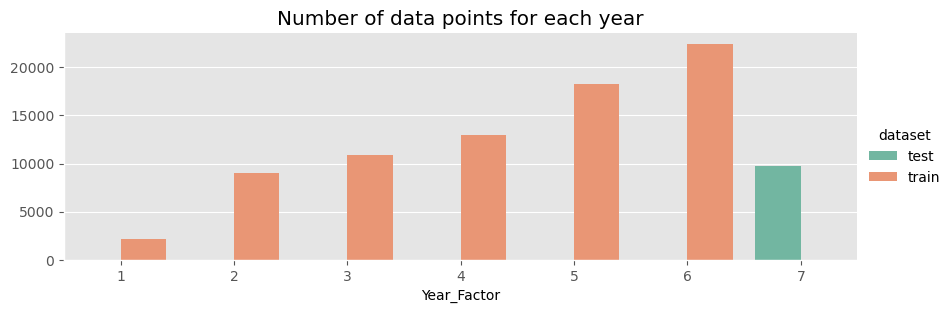

In [39]:
ax = sns.catplot(x='Year_Factor', y='id',
                 data=combined_df.groupby(['dataset','Year_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset', kind='bar', aspect=3, height=3)\
.set(title="Number of data points for each year", ylabel=None)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
1. The dataset contains time variable, 'Year_Factor', that has values from 1 to 7.

2. Assuming the values are consecutive years, 'train' dataset contains the first 6 years and 'test' set contains the 7th year.

3. 'train' set contains data points in first 6 states. However, 'test' doesn't have any data point from 'State_1' to 'State_6'.
</div>

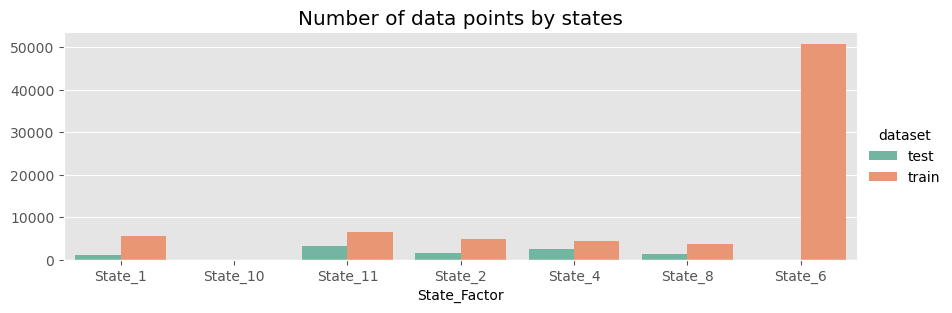

In [40]:
ax = sns.catplot(x='State_Factor', y='id',
                 data=combined_df.groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset', kind='bar', aspect=3, height=3)\
.set(title="Number of data points by states", ylabel=None)

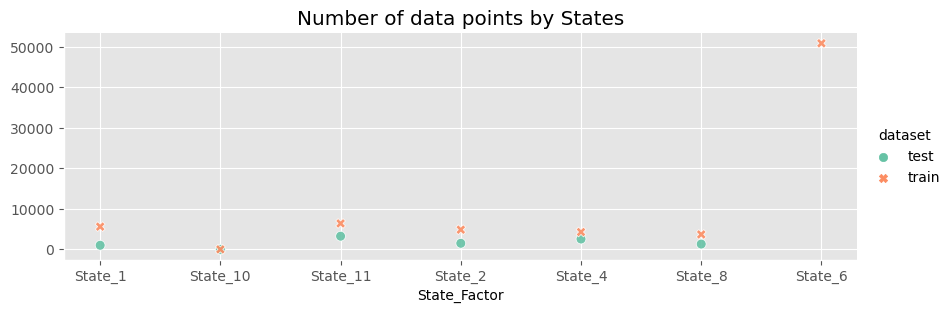

In [41]:
ax = sns.relplot(x='State_Factor', 
                 y='id', 
                 data=combined_df.groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset', style='dataset', aspect=3, height=3, s=50, alpha=0.9)\
.set(title = "Number of data points by States", ylabel=None)

In [42]:
df_train["State_Factor"].unique()

array(['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10',
       'State_11'], dtype=object)

In [43]:
df_test["State_Factor"].unique()

array(['State_1', 'State_2', 'State_4', 'State_8', 'State_11', 'State_10'],
      dtype=object)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
1. Both residential and commercial buildings are present in both datasets.
    
2. 'train' data contains more residential buildings compared to 'test' set which is due to the number of 'State_6' buildings in 'train' set which seems to add the count. Apart from 'State_6', the number of commercial buildings are higher than the residential buildings.
    
3. 'State_10' contains only commercial buildings. The type of building and state could be important factors in determining 'SEUI'.
</div>

Text(0.5, 0, '')

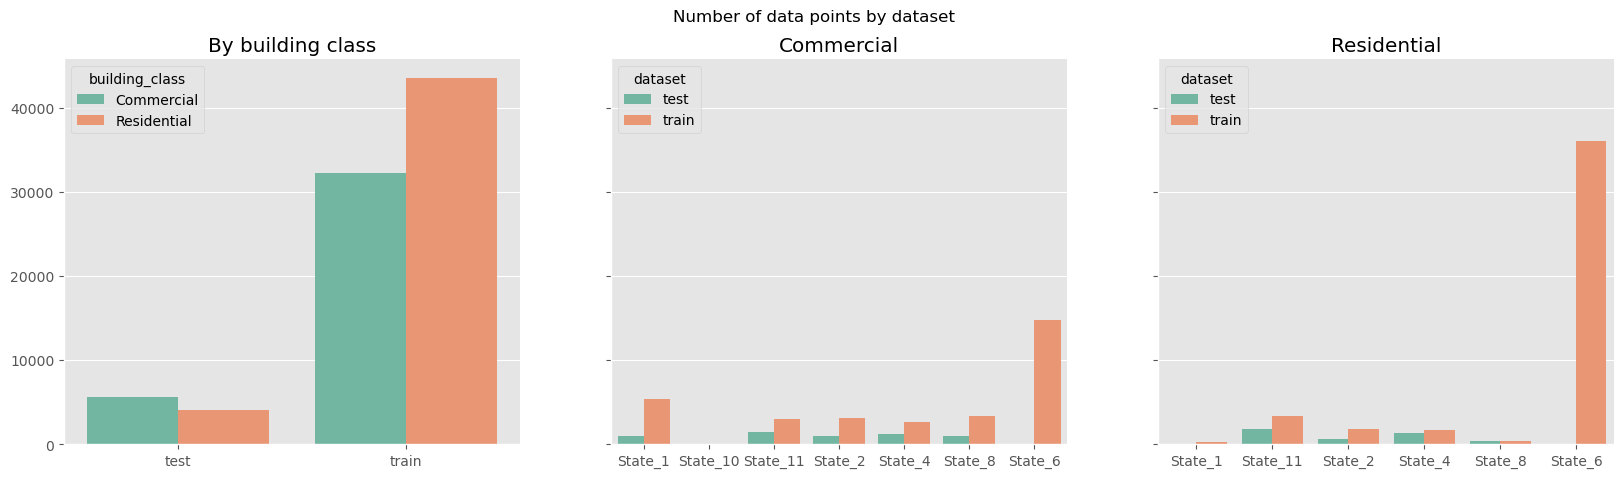

In [44]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
fig.suptitle("Number of data points by dataset")

sns.barplot(x='dataset',
            y='id',
            data=combined_df.groupby(['dataset','building_class']).agg({'id':'count'}).reset_index(),
            hue='building_class',
            ax=ax[0],
            ci=False)

for e, s in enumerate(combined_df['building_class'].unique(),1):
    sns.barplot(x='State_Factor',
                y='id',
                data=combined_df[combined_df['building_class']==s].groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                hue='dataset',
                ax=ax[e],
                ci=False)
    ax[e].set_title(s)
    ax[e].set_ylabel("")
    ax[e].set_xlabel("")

ax[0].set_title("By building class")
ax[0].set_ylabel("")
ax[0].set_xlabel("")

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
All facility types are present in both datasets. 'Multifamily_uncategorized' and 'Office_uncategorized' count is more in 'State_6' of the training set. Not quite sure how 'State_6' will affect the model learning and prediction.
</div>

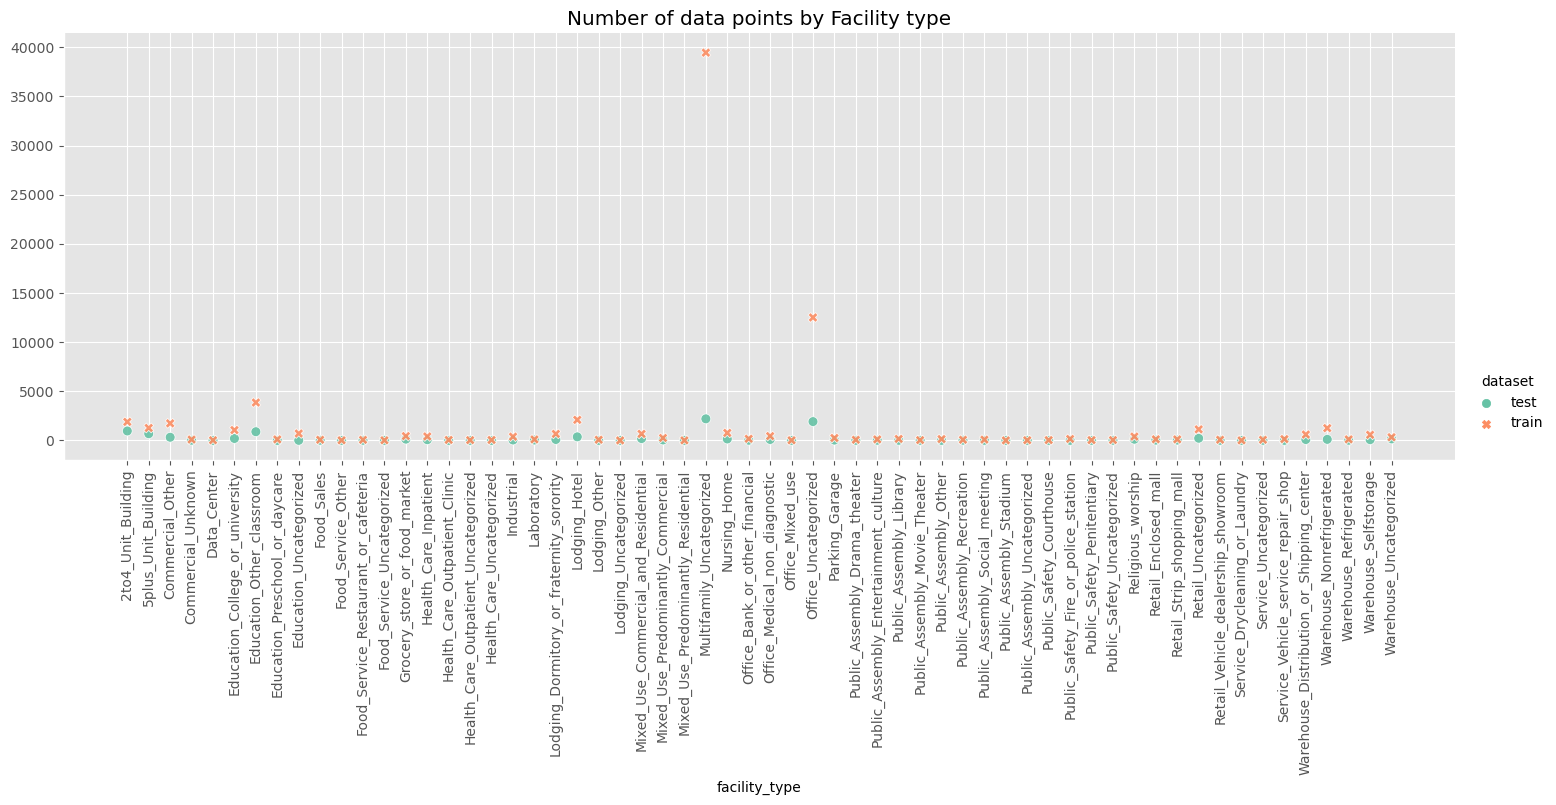

In [45]:
ax = sns.relplot(x='facility_type', y='id', 
                 data=combined_df.groupby(['dataset','facility_type']).agg({'id':'count'}).reset_index(),
                 hue='dataset', style='dataset', aspect=3, height=5, s=50, alpha=0.9)\
.set(title = "Number of data points by Facility type", ylabel=None)
ax.set_xticklabels(rotation=90) 
None

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">The oldest building was built in 1600 and the latest in 2016. The majority of the buildings were built since 1900. There were some 0 and null values. Not quite sure what 0 signifies.</div>

In [46]:
combined_df['year_built'].value_counts().index.sort_values()

Float64Index([   0.0, 1600.0, 1649.0, 1732.0, 1756.0, 1789.0, 1799.0, 1800.0,
              1811.0, 1815.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=183)

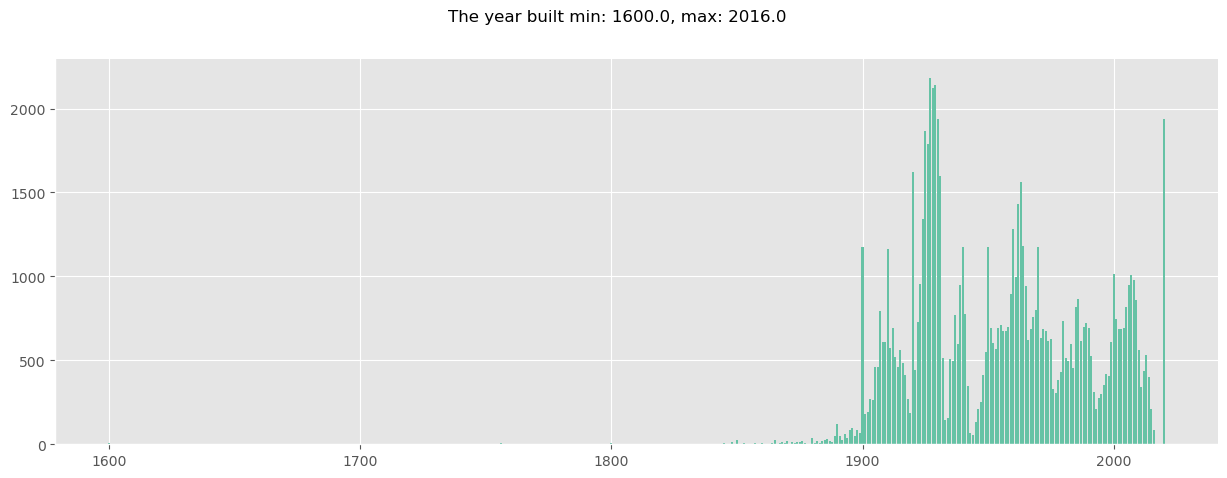

In [47]:
temp = combined_df[['year_built']].fillna(2020).replace({0:2020}).astype('category').value_counts().reset_index().rename({0:'count'},axis=1)\
.sort_values('year_built')
# temp['year_built'] = temp['year_built'].astype('category')
fig, ax = plt.subplots(figsize=(15,5))

ax=plt.bar(temp['year_built'], temp['count'])

fig.suptitle(f"The year built min: {min(temp['year_built'])}, max: {max(combined_df['year_built'])}");

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    'train' set buildings have higher floor areas compared to 'test' set buildings and small positive correlation between 'floor_area' and 'energy_star_rating' can be observable. </div>

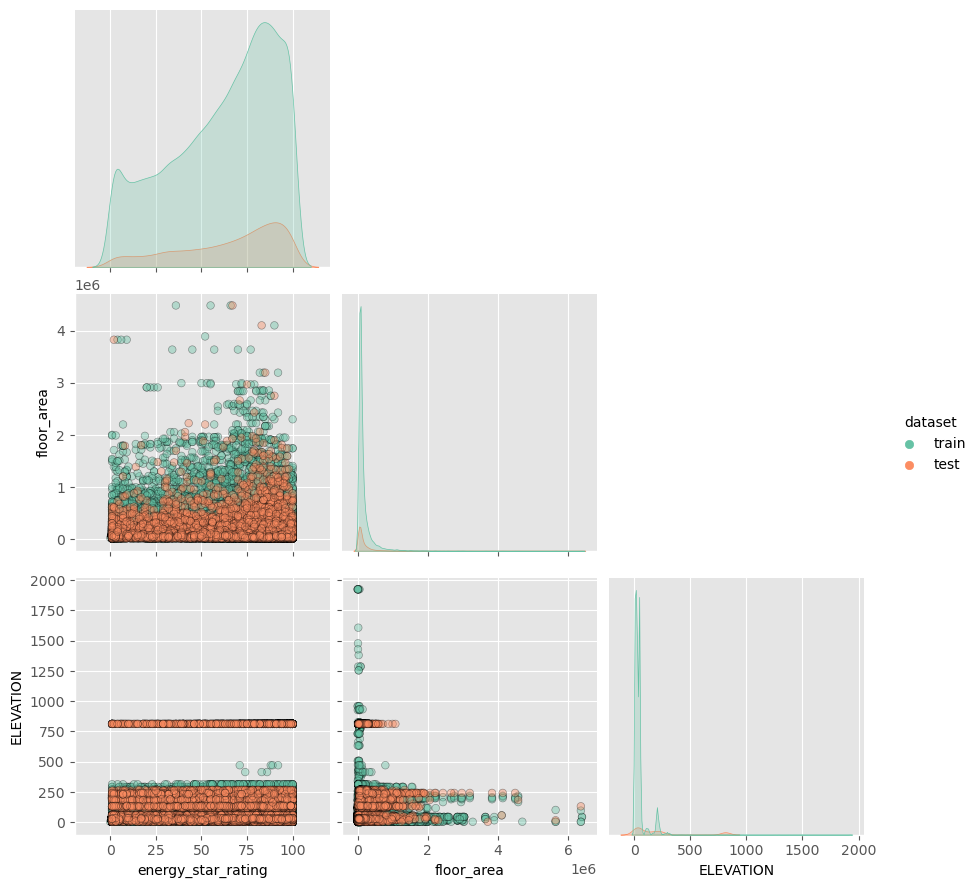

In [50]:
sns.pairplot(combined_df, vars=['energy_star_rating','floor_area','ELEVATION'], 
            hue='dataset', height=3, plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'}, corner=True);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">According to the average temperature (`avg_temp`), if we list states from warmest to coldest: State 1, State 10, State 2, and State 8. The range of temperatures of State1, State 6,  State 11 and State 4 are higher compared to the other states. </div>

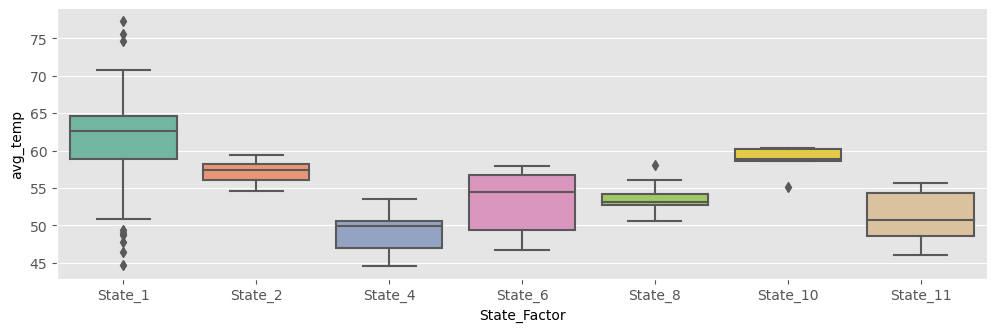

In [56]:
fig, ax = plt.subplots(figsize=(12,3.5))
sns.boxplot(data=combined_df[['avg_temp','State_Factor']].drop_duplicates(), y='avg_temp', x='State_Factor');


# any one categorical col (with low unique vals)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Each month has unique temperature values between 31 and 59 which means the values in temperature volumes are highly repeated for the data points.</div>

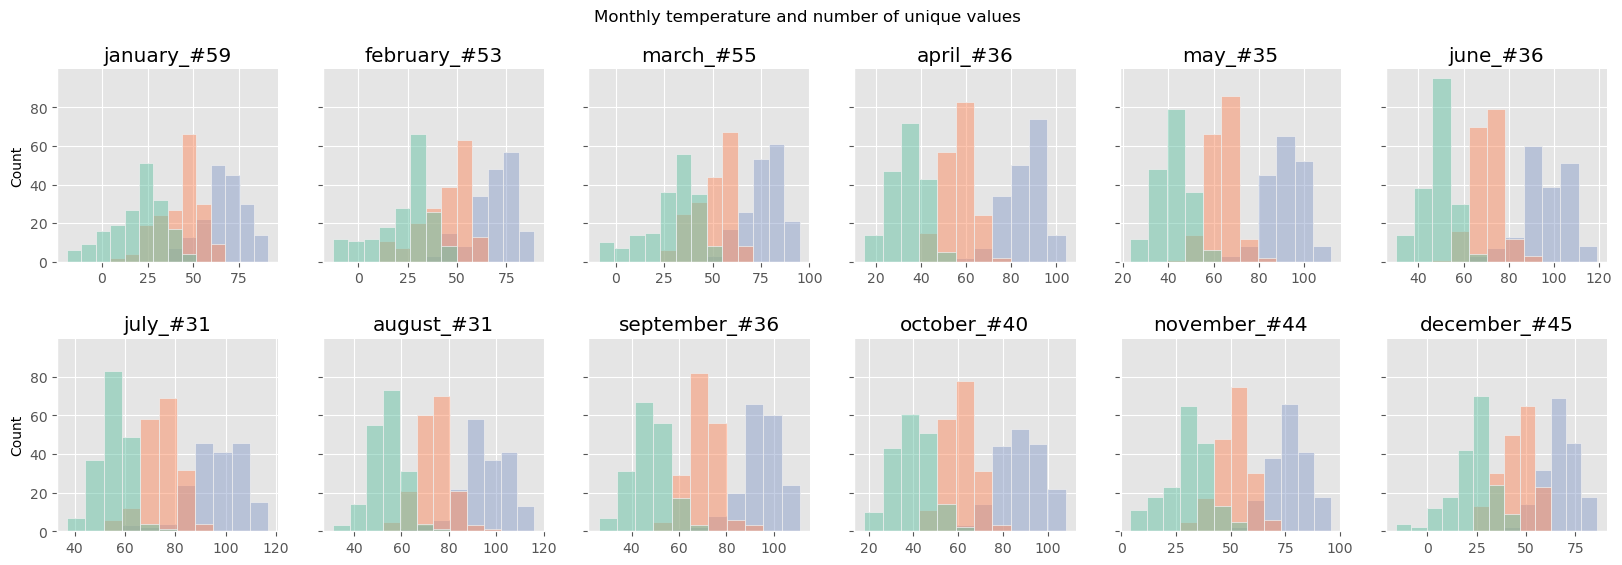

In [59]:
cols = [['january_min_temp', 'january_avg_temp', 'january_max_temp'],
        ['february_min_temp', 'february_avg_temp', 'february_max_temp'],
        ['march_min_temp', 'march_avg_temp', 'march_max_temp'], 
        ['april_min_temp','april_avg_temp', 'april_max_temp'], 
        ['may_min_temp', 'may_avg_temp','may_max_temp'], 
        ['june_min_temp', 'june_avg_temp', 'june_max_temp'],
        ['july_min_temp', 'july_avg_temp', 'july_max_temp'], 
        ['august_min_temp','august_avg_temp', 'august_max_temp'], 
        ['september_min_temp','september_avg_temp', 'september_max_temp'], 
        ['october_min_temp','october_avg_temp', 'october_max_temp'], 
        ['november_min_temp','november_avg_temp', 'november_max_temp'], 
        ['december_min_temp','december_avg_temp', 'december_max_temp']]
        
fig, ax = plt.subplots(2, 6, figsize=(20,6), sharey=True)
fig.suptitle("Monthly temperature and number of unique values")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(combined_df[c].drop_duplicates(), ax=ax[0,e], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(combined_df[c[0]].unique())))
    else:
        sns.histplot(combined_df[c].drop_duplicates(), ax=ax[1,e-6], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(combined_df[c[0]].unique())))
        
plt.subplots_adjust(hspace=0.4)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Other weather related numerical columns also have few unique values.</div>

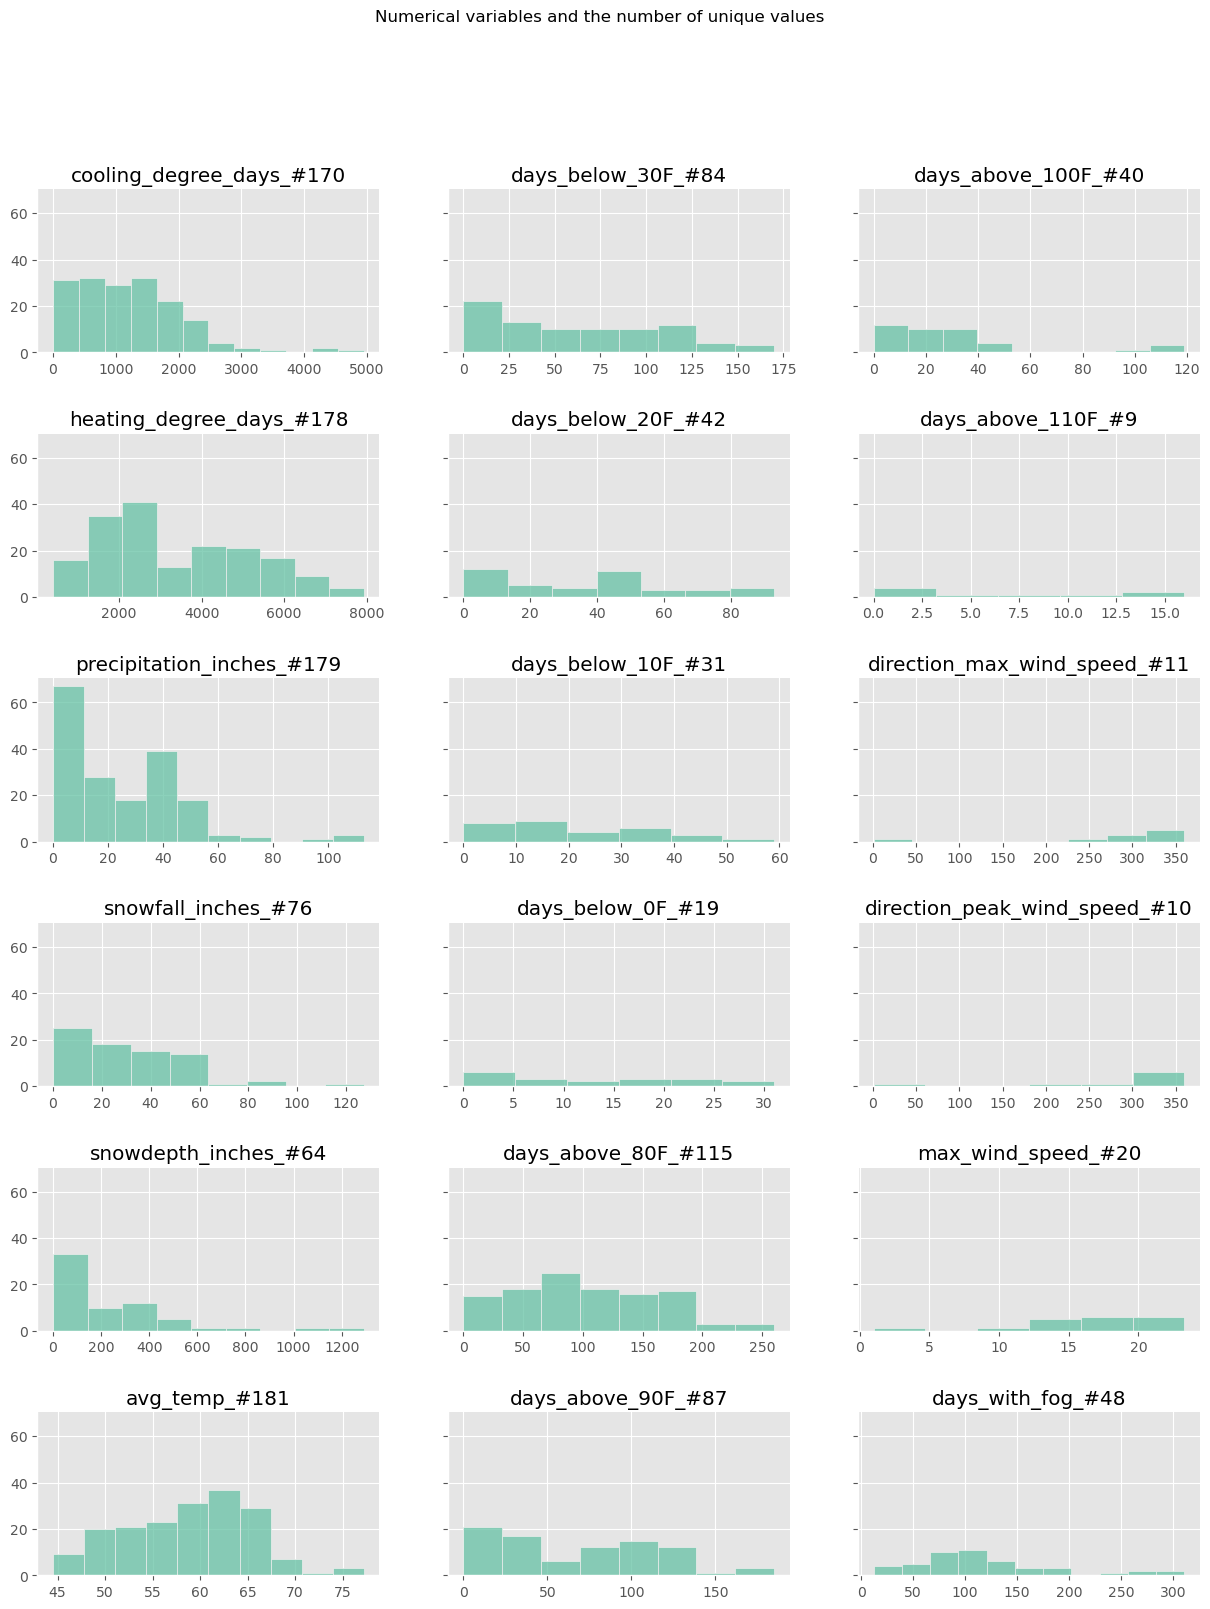

In [65]:
cols=['cooling_degree_days','heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

fig, ax = plt.subplots(6,3, figsize=(15,18), sharey=True)
fig.suptitle("Numerical variables and the number of unique values")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(combined_df[c].drop_duplicates(), ax=ax[e,0], legend=False)\
        .set(title=c+"_#"+str(len(combined_df[c].unique())), ylabel=None, xlabel=None)
    elif (e>=6) & (e<=11):
        sns.histplot(combined_df[c].drop_duplicates(), ax=ax[e-6,1], legend=False)\
        .set(title=c+"_#"+str(len(combined_df[c].unique())), ylabel=None, xlabel=None)
    else:
        sns.histplot(combined_df[c].drop_duplicates(), ax=ax[e-12,2], legend=False)\
        .set(title=c+"_#"+str(len(combined_df[c].unique())), ylabel=None, xlabel=None)
        
plt.subplots_adjust(hspace=0.5)

In [ ]:

# # larger datasets
# find groups in the columns
# elevation, floor areas (dimentions)
# temperature
# wind




### <span style="font-family:cursive;text-align:center">📌Target Variable Exploration (EUI)</span>

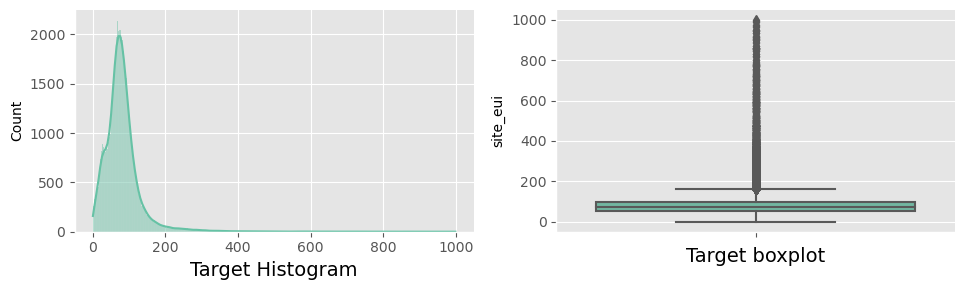

In [73]:
plt.figure(figsize=(9.75,3))
ax1 = plt.subplot(1,2,1)
cp = sns.histplot(x=combined_df['site_eui'], kde=True, palette='Set2')
ax1.set_xlabel('Target Histogram', fontsize=14)
ax2 = plt.subplot(1,2,2)
sns.boxplot(y=combined_df['site_eui'], palette='Set2')
ax2.set_xlabel('Target boxplot', fontsize=14)
plt.tight_layout();

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
1. The above Histogram graph shows that the Target is skewed.
2. Has outliers
3. Decision = log-transform,  IQR outlier treatment


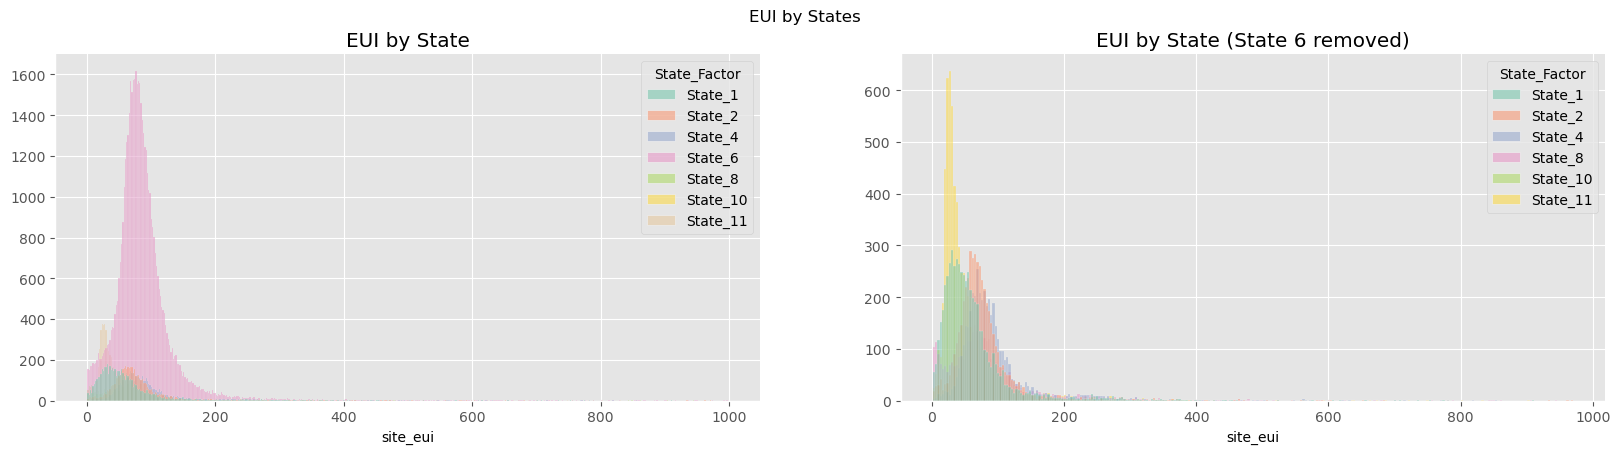

In [75]:
fig, ax = plt.subplots(1,2, figsize=(20,4.5))
fig.suptitle("EUI by States")

sns.histplot(combined_df, x='site_eui',hue='State_Factor', ax=ax[0])\
.set(title='EUI by State', ylabel=None)

sns.histplot(combined_df[combined_df['State_Factor']!='State_6'], x='site_eui', hue='State_Factor', ax=ax[1])\
.set(title='EUI by State (State 6 removed)', ylabel=None);

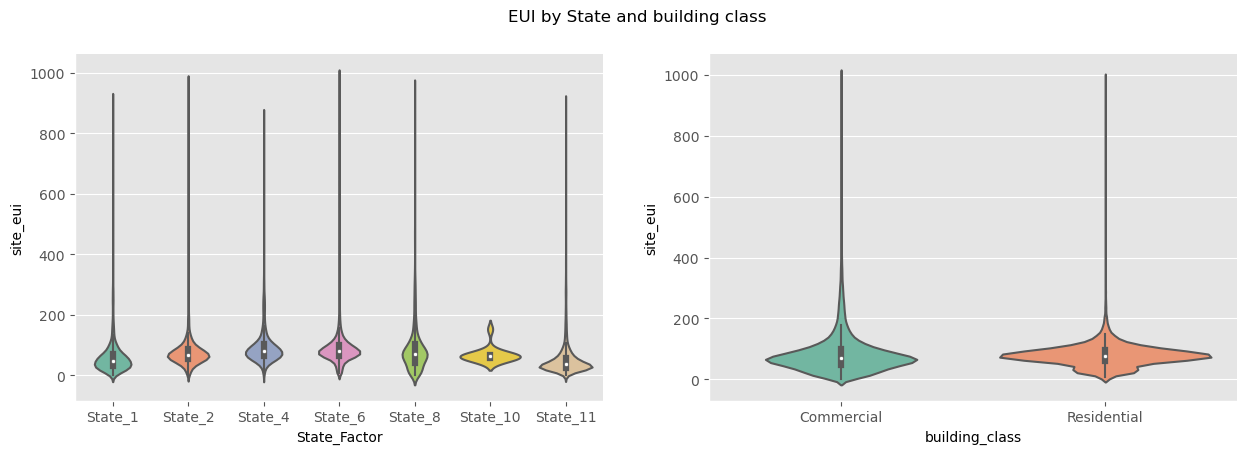

In [76]:
fig, ax = plt.subplots(1,2, figsize=(15,4.5))
fig.suptitle("EUI by State and building class")

sns.violinplot(data=combined_df, y='site_eui', x='State_Factor', ax=ax[0])
sns.violinplot(data=combined_df, y='site_eui', x='building_class', ax=ax[1]);

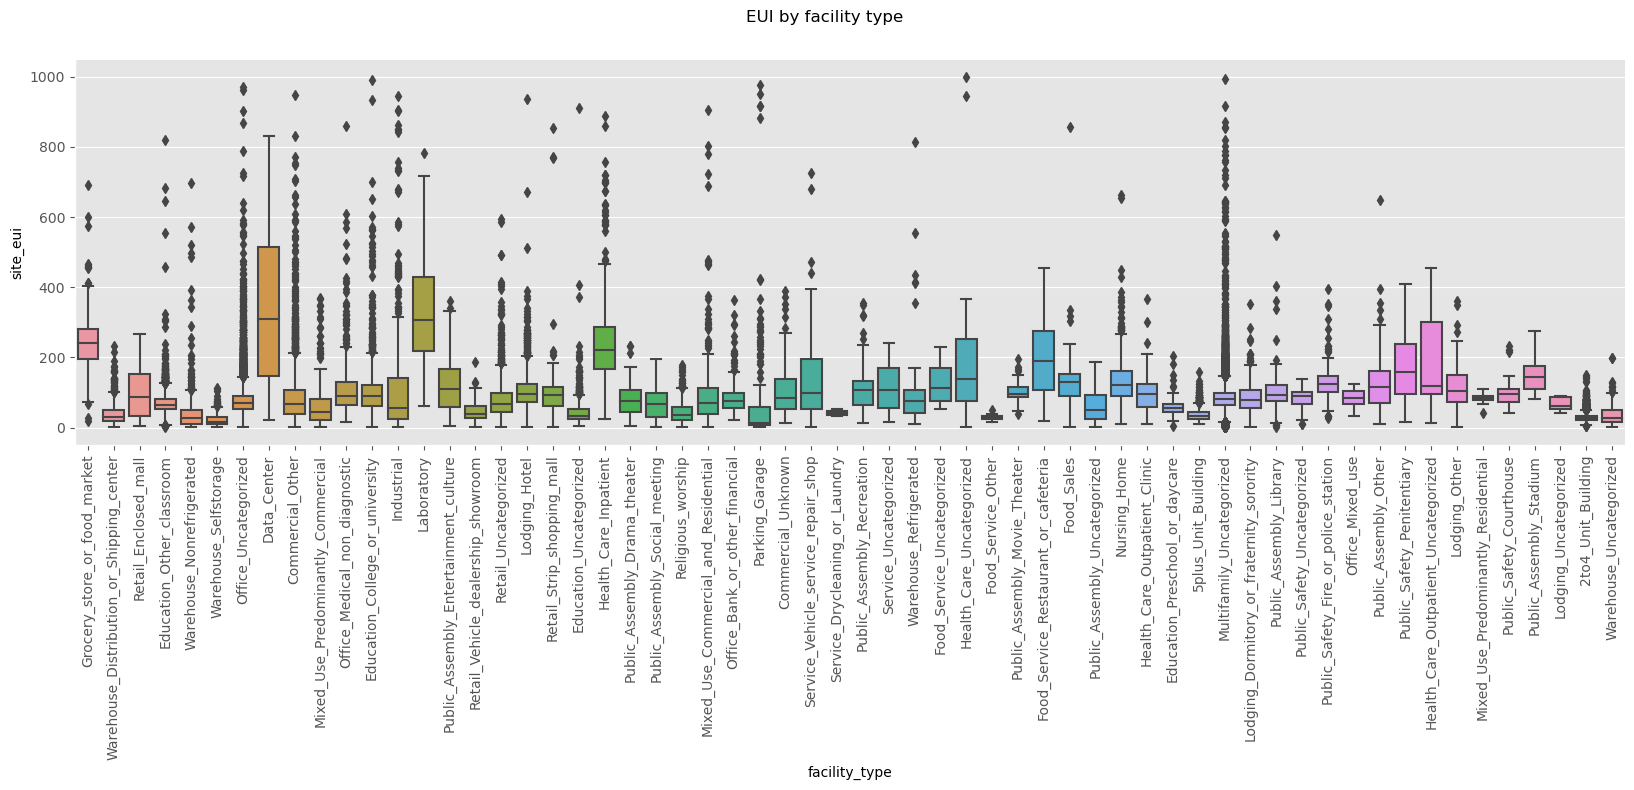

In [77]:
fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("EUI by facility type")
ax=sns.boxplot(data=combined_df, y='site_eui', x='facility_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
1. Labs and Data Centers have higher EUI compared to the other types of buildings.
2. Grocery stores, Health Care Inpatient, Health Care Uncategorized, Health Care Outpatient, and Food service, restaurants have higher range of EUI.
3. It could be the essential services must operate for longer hours, therefore, have higher EUI.</div>

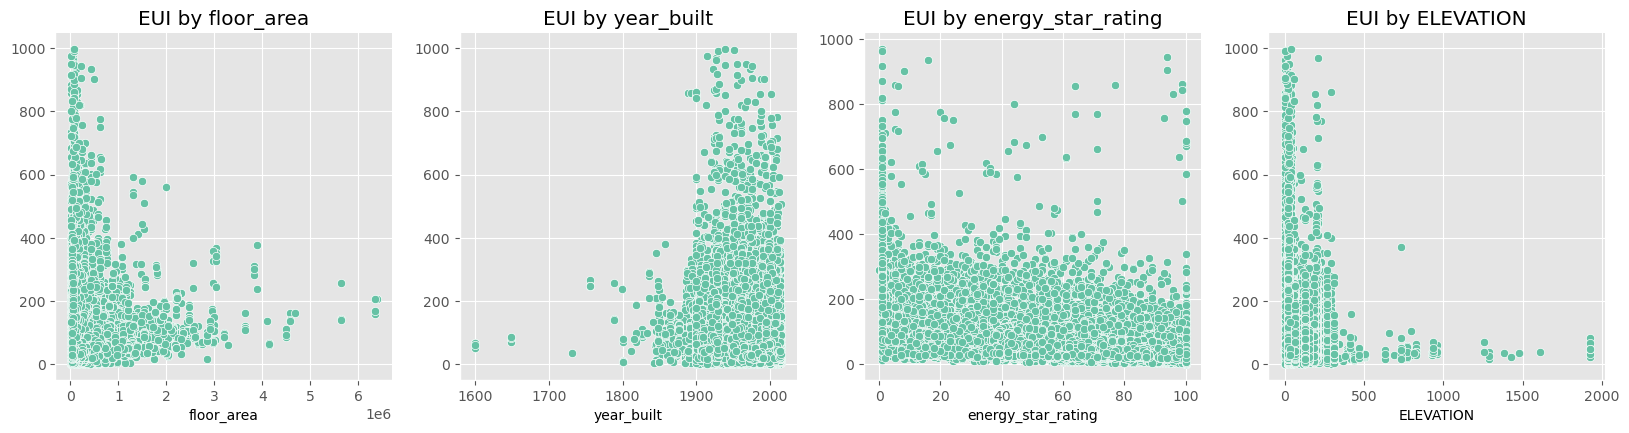

In [78]:
fig, ax = plt.subplots(1,4, figsize=(20,4.5))

for e, col in enumerate(['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION']):
    if col =='year_built':
        sns.scatterplot(data=combined_df[(combined_df['year_built']!=0) & (combined_df['year_built'].notna())], 
                        x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None)
    else:
        sns.scatterplot(data=combined_df, x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
1. 'floor_area' could have positive relationship with 'EUI'.
2. The younger buildings tend to have higher 'EUI' which could be because building height and size have increased over the years.
3. It looks like the Higher the 'energy_star_rating' is, the lower the 'EUI' becomes.
4. Lesser the elevation higher is the 'EUI' index</div>

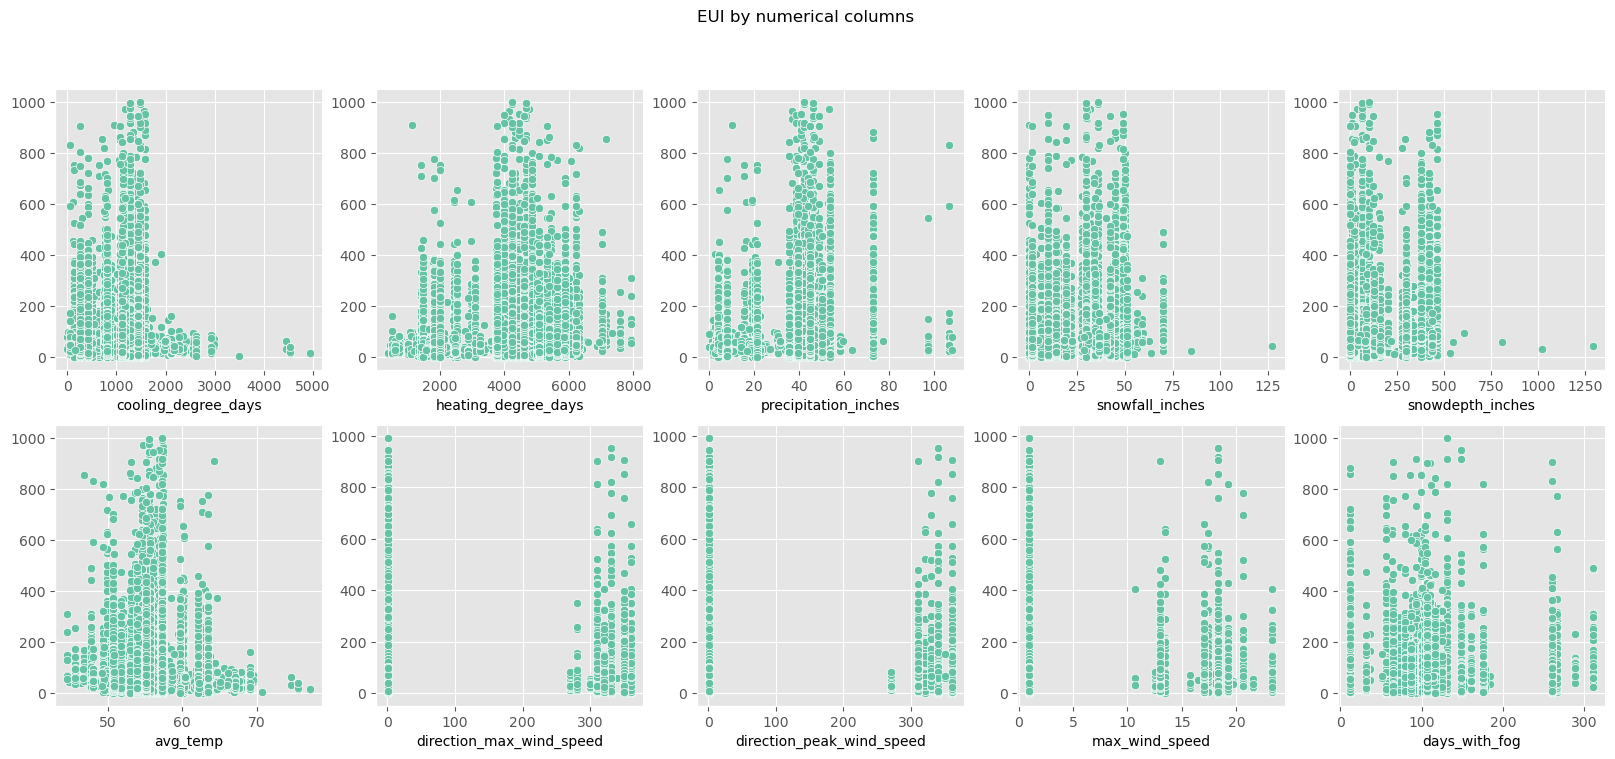

In [80]:
cols=[['cooling_degree_days','heating_degree_days', 'precipitation_inches', 
      'snowfall_inches','snowdepth_inches'], 
      ['avg_temp', 
      'direction_max_wind_speed','direction_peak_wind_speed', 'max_wind_speed', 
      'days_with_fog']]

fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('EUI by numerical columns')

for e1, l in enumerate(cols):
    for e2, col in enumerate(l):
        sns.scatterplot(data=combined_df, 
                        x=col, y='site_eui', ax=ax[e1, e2]).set(ylabel=None);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
1. The most data points are in lower number of 'cooling_degree_days' and higher number of 'heating_degree_days'.
2. The majority of the datapoints are also in the lower levels of 'snowfall_inches' and 'snowdepth_inches'.
3. 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', and 'days_with_fog' columns have the 'NA' values of over 50%.
4. No relationship between 'EUI' and the weather related numerica columns could be observed from the plot.</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

- Categorical variables such as `State_Factor`, `building_class` and `facility_type` might have some correlation with `EUI`.
- `State_6` is not present in `test` set. State 6 removed training data should be tested.
- `floor_area`, `energe_star_rating` should be included in the modelling to be tested.
- From the plots, it's difficult to observe direct (linear) relationship between `EUI` and weather related variables. However, this doesn't deny non-linear relationships among the variables.
- Variables with more than 50% `NA` values should not be imputed (in my opinion) and better to be not included in the training set.
- Weather variables have few unique values repeated throughout the datapoints. Not sure how this duplicated values might affect the modeling and prediction.

# <span style="font-family:cursive;text-align:center">⚙️ Preprocessing</span>



<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    we will suppose that two  if two buildings have the same values for these features;   
they are the same building, in other words groupby_cols = (building_id)


Removing duplicates by clubbing similar building data
</div>

In [ ]:
# null values,
# weather data points have a lot of repetition
# categories encoded

In [9]:
groupby_cols = ['State_Factor','building_class','facility_type','floor_area','year_built']
df_all = df_all.sort_values(by=groupby_cols+['Year_Factor']).reset_index(drop=True)

In [10]:
df_all.loc[:,df_all.dtypes=='object'].columns

Index(['State_Factor', 'building_class', 'facility_type', 'dataset'], dtype='object')


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    Null imputation for categorical values: <b>KNN Imputing</b>
</div>

In [81]:
combined_df_one_hot = combined_df.copy() 

cats = ['State_Factor', 'facility_type', 'building_class']
for col in cats:
    dummies = pd.get_dummies(combined_df_one_hot[col], dummy_na=False)
    for ohe_col in dummies:
        combined_df_one_hot[f'ohe_{col}_{ohe_col}'] = dummies[ohe_col]

In [82]:
combined_df_one_hot

Year_Factor State_Factor building_class  \
0                1      State_1     Commercial   
1                1      State_1     Commercial   
2                1      State_1     Commercial   
3                1      State_1     Commercial   
4                1      State_1     Commercial   
...            ...          ...            ...   
85457            7     State_11    Residential   
85458            7     State_11    Residential   
85459            7     State_11    Residential   
85460            7     State_11    Residential   
85461            7     State_11    Residential   

                                   facility_type  floor_area  year_built  \
0                   Grocery_store_or_food_market     61242.0      1942.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                           Retail_Enclosed_mall    280025.0      1951.0   
3                      Education_Other_classroom     55325.0      1980.0   
4                      Warehouse_Nonrefrigerated     66000.0      1985.0   
...                                          ...         ...         ...   
85457                        5plus_Unit_Building    305925.0      2013.0   
85458                        5plus_Unit_Building     34909.0      1910.0   
85459                        5plus_Unit_Building     42393.0      2014.0   
85460                        5plus_Unit_Building     25368.0      1992.0   
85461                        5plus_Unit_Building     45640.0      1994.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36          50.50000   
1                    45.0        1.8                36          50.50000   
2                    97.0        1.8                36          50.50000   
3                    46.0        1.8                36          50.50000   
4                   100.0        2.4                36          50.50000   
...                   ...        ...               ...               ...   
85457                99.0      812.0                21          38.66129   
85458                94.0       26.5                21          38.66129   
85459                94.0      812.0                21          38.66129   
85460                79.0      812.0                21          38.66129   
85461                87.0       26.5                21          38.66129   

       january_max_temp  february_min_temp  february_avg_temp  \
0                    68                 35          50.589286   
1                    68                 35          50.589286   
2                    68                 35          50.589286   
3                    68                 35          50.589286   
4                    68                 35          50.589286   
...                 ...                ...                ...   
85457                54                 28          41.625000   
85458                54                 28          41.625000   
85459                54                 28          41.625000   
85460                54                 28          41.625000   
85461                54                 28          41.625000   

       february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                     73              40       53.693548              80   
1                     73              40       53.693548              80   
2                     73              40       53.693548              80   
3                     73              40       53.693548              80   
4                     73              40       53.693548              80   
...                  ...             ...             ...             ...   
85457                 59              33       46.500000              59   
85458                 59              33       46.500000              59   
85459                 59              33       46.500000              59   
85460                 59              3

In [84]:
imputer = KNNImputer(n_neighbors=7)
# Selecting the columns for imputation
tmp = combined_df[['State_Factor', 'building_class', 'facility_type', 'dataset', target]]
# Then dropping the columns that were used for imputation
df = combined_df.drop(tmp.columns, axis=1)
# Perform imputation and create a new DataFrame
df1 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
# Save intermediate imputed DataFrame to CSV
tmp.to_csv('imputer_tmp.csv', index=False)
# Save final imputed DataFrame to CSV
df1.to_csv('imputer_df1.csv', index=False)
# Save trained KNNImputer object to a joblib file
joblib.dump(imputer, 'knn_imputer.pkl')

['knn_imputer.pkl']

In [85]:
# This takes 1 hr, hence, unpickle the df1 and carry on with knn_imputing = False

knn_imputing = False # Set this to True if you want to perform KNN imputation
target='site_eui'

if knn_imputing:
    imputer = KNNImputer(n_neighbors=7)
    tmp = combined_df[['State_Factor', 'building_class', 'facility_type', 'dataset', target]]
    df = combined_df.drop(tmp.columns, axis=1)
    df1 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
    tmp.to_csv('imputer_tmp.csv', index=False)
    df1.to_csv('imputer_df1.csv', index=False)
    joblib.dump(imputer, 'knn_imputer.pkl')

else:
    df1 = pd.read_csv('imputer_df1.csv') # Read the imputed DataFrames
    tmp = combined_df[['State_Factor', 'building_class', 'facility_type', 'dataset', target]]
    # Combine imputed columns back to the original DataFrame
    combined_df = combined_df.drop(tmp.columns, axis=1)
    for col in tmp.columns:
        combined_df[col]=tmp[col]
    for col in df1.columns:
        combined_df[col] = df1[col]


# df1: no null values
# tmp: seperated columns
#     df1 + tmp  => final df



# null points  => neighbours (most gets imputed)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <b>Target encoding</b> for categorical columns.  
Target encoding is the process of replacing a categorical value with the mean of the target variable. Any non-categorical columns are automatically dropped by the target encoder model.

Note: You can also use target encoding to convert categorical columns to numeric. 

> “features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.”

[Target Encoding Vs. One-hot Encoding with Simple Examples](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64)
<div>

In [89]:
df_combined_te = combined_df.copy()

# List of categorical columns for target encoding
cats = ['State_Factor', 'building_class', 'facility_type']

# Loop through each categorical column and perform target encoding
for col in cats:
    encoder = TargetEncoder()
    # Create a new column with the target-encoded values
    df_combined_te[f'te_{col}'] = encoder.fit_transform(df_combined_te[col], df_combined_te[target])

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <b>Note:</b> for Large dataframe with categorical columns.
    
1. In Linear regression based models, labels are associated with weights to the classes.     

2. In OHE dimensionality increases.
    
3. Where there is higher dimentions of data and also when there is no order in the classes, OHE and Label encoding both are are not suggested.
    
4. So better to use Target encoding:
Target encoding is the process of replacing a categorical value with the mean of the target variable. Any non-categorical columns are automatically dropped by the target encoder model.

Note: Target encoding to converts categorical columns to numeric float value. 



[Target Encoding Vs. One-hot Encoding with Simple Examples](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64)
<div>

In [91]:
df_combined_te

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0              1.0     61242.0      1942.0                11.0        2.4   
1              1.0    274000.0      1955.0                45.0        1.8   
2              1.0    280025.0      1951.0                97.0        1.8   
3              1.0     55325.0      1980.0                46.0        1.8   
4              1.0     66000.0      1985.0               100.0        2.4   
...            ...         ...         ...                 ...        ...   
85457          7.0    305925.0      2013.0                99.0      812.0   
85458          7.0     34909.0      1910.0                94.0       26.5   
85459          7.0     42393.0      2014.0                94.0      812.0   
85460          7.0     25368.0      1992.0                79.0      812.0   
85461          7.0     45640.0      1994.0                87.0       26.5   

       january_min_temp  january_avg_temp  january_max_temp  \
0                  36.0          50.50000              68.0   
1                  36.0          50.50000              68.0   
2                  36.0          50.50000              68.0   
3                  36.0          50.50000              68.0   
4                  36.0          50.50000              68.0   
...                 ...               ...               ...   
85457              21.0          38.66129              54.0   
85458              21.0          38.66129              54.0   
85459              21.0          38.66129              54.0   
85460              21.0          38.66129              54.0   
85461              21.0          38.66129              54.0   

       february_min_temp  february_avg_temp  february_max_temp  \
0                   35.0          50.589286               73.0   
1                   35.0          50.589286               73.0   
2                   35.0          50.589286               73.0   
3                   35.0          50.589286               73.0   
4                   35.0          50.589286               73.0   
...                  ...                ...                ...   
85457               28.0          41.625000               59.0   
85458               28.0          41.625000               59.0   
85459               28.0          41.625000               59.0   
85460               28.0          41.625000               59.0   
85461               28.0          41.625000               59.0   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0                40.0       53.693548            80.0            41.0   
1                40.0       53.693548            80.0            41.0   
2                40.0       53.693548            80.0            41.0   
3                40.0       53.693548            80.0            41.0   
4                40.0       53.693548            80.0            41.0   
...               ...             ...             ...             ...   
85457            33.0       46.500000            59.0            37.0   
85458            33.0       46.500000            59.0            37.0   
85459            33.0       46.500000            59.0            37.0   
85460            33.0       46.500000            59.0            37.0   
85461            33.0       46.500000            59.0            37.0   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0           55.500000            78.0          46.0     56.854839   
1           55.500000            78.0          46.0     56.854839   
2           55.500000            78.0          46.0     56.854839   
3           55.500000            78.0          46.0     56.854839   
4           55.500000            78.0          46.0     56.854839   
...               ...             ...           ...           ...   
85457       50.833333            67.0          42.0     58.112903   
85458       50.833333            67.0          42.0     58.112903   
85459       50.833333            6

# <span style="font-family:cursive;text-align:center">Feature Engineering</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    <font size='3.5pt'><b>Weather based features</b></font>

we will extract new weather statistics from the building location weather features

In [92]:
# extract new weather statistics from the building location weather features
temp = [col for col in df_combined_te.columns if 'temp' in col]

df_combined_te['min_temp'] = df_combined_te[temp].min(axis=1)
df_combined_te['max_temp'] = df_combined_te[temp].max(axis=1)
df_combined_te['avg_temp'] = df_combined_te[temp].mean(axis=1)
df_combined_te['std_temp'] = df_combined_te[temp].std(axis=1)
df_combined_te['skew_temp'] = df_combined_te[temp].skew(axis=1)


# by seasons
temp = pd.Series([col for col in df_combined_te.columns if 'temp' in col])

winter_temp = temp[temp.apply(lambda x: ('january' in x or 'february' in x or 'december' in x))].values
spring_temp = temp[temp.apply(lambda x: ('march' in x or 'april' in x or 'may' in x))].values
summer_temp = temp[temp.apply(lambda x: ('june' in x or 'july' in x or 'august' in x))].values
autumn_temp = temp[temp.apply(lambda x: ('september' in x or 'october' in x or 'november' in x))].values


### winter
df_combined_te['min_winter_temp'] = df_combined_te[winter_temp].min(axis=1)
df_combined_te['max_winter_temp'] = df_combined_te[winter_temp].max(axis=1)
df_combined_te['avg_winter_temp'] = df_combined_te[winter_temp].mean(axis=1)
df_combined_te['std_winter_temp'] = df_combined_te[winter_temp].std(axis=1)
df_combined_te['skew_winter_temp'] = df_combined_te[winter_temp].skew(axis=1)


### spring
df_combined_te['min_spring_temp'] = df_combined_te[spring_temp].min(axis=1)
df_combined_te['max_spring_temp'] = df_combined_te[spring_temp].max(axis=1)
df_combined_te['avg_spring_temp'] = df_combined_te[spring_temp].mean(axis=1)
df_combined_te['std_spring_temp'] = df_combined_te[spring_temp].std(axis=1)
df_combined_te['skew_spring_temp'] = df_combined_te[spring_temp].skew(axis=1)


### summer
df_combined_te['min_summer_temp'] = df_combined_te[summer_temp].min(axis=1)
df_combined_te['max_summer_temp'] = df_combined_te[summer_temp].max(axis=1)
df_combined_te['avg_summer_temp'] = df_combined_te[summer_temp].mean(axis=1)
df_combined_te['std_summer_temp'] = df_combined_te[summer_temp].max(axis=1)
df_combined_te['skew_summer_temp'] = df_combined_te[summer_temp].max(axis=1)


## autumn
df_combined_te['min_autumn_temp'] = df_combined_te[autumn_temp].min(axis=1)
df_combined_te['max_autumn_temp'] = df_combined_te[autumn_temp].max(axis=1)
df_combined_te['avg_autumn_temp'] = df_combined_te[autumn_temp].mean(axis=1)
df_combined_te['std_autumn_temp'] = df_combined_te[autumn_temp].std(axis=1)
df_combined_te['skew_autumn_temp'] = df_combined_te[autumn_temp].skew(axis=1)

In [93]:
df_combined_te['month_cooling_degree_days'] = df_combined_te['cooling_degree_days']/12
df_combined_te['month_heating_degree_days'] = df_combined_te['heating_degree_days']/12

In [94]:
df_combined_te[temp]

january_min_temp  january_avg_temp  january_max_temp  \
0                  36.0          50.50000              68.0   
1                  36.0          50.50000              68.0   
2                  36.0          50.50000              68.0   
3                  36.0          50.50000              68.0   
4                  36.0          50.50000              68.0   
...                 ...               ...               ...   
85457              21.0          38.66129              54.0   
85458              21.0          38.66129              54.0   
85459              21.0          38.66129              54.0   
85460              21.0          38.66129              54.0   
85461              21.0          38.66129              54.0   

       february_min_temp  february_avg_temp  february_max_temp  \
0                   35.0          50.589286               73.0   
1                   35.0          50.589286               73.0   
2                   35.0          50.589286               73.0   
3                   35.0          50.589286               73.0   
4                   35.0          50.589286               73.0   
...                  ...                ...                ...   
85457               28.0          41.625000               59.0   
85458               28.0          41.625000               59.0   
85459               28.0          41.625000               59.0   
85460               28.0          41.625000               59.0   
85461               28.0          41.625000               59.0   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0                40.0       53.693548            80.0            41.0   
1                40.0       53.693548            80.0            41.0   
2                40.0       53.693548            80.0            41.0   
3                40.0       53.693548            80.0            41.0   
4                40.0       53.693548            80.0            41.0   
...               ...             ...             ...             ...   
85457            33.0       46.500000            59.0            37.0   
85458            33.0       46.500000            59.0            37.0   
85459            33.0       46.500000            59.0            37.0   
85460            33.0       46.500000            59.0            37.0   
85461            33.0       46.500000            59.0            37.0   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0           55.500000            78.0          46.0     56.854839   
1           55.500000            78.0          46.0     56.854839   
2           55.500000            78.0          46.0     56.854839   
3           55.500000            78.0          46.0     56.854839   
4           55.500000            78.0          46.0     56.854839   
...               ...             ...           ...           ...   
85457       50.833333            67.0          42.0     58.112903   
85458       50.833333            67.0          42.0     58.112903   
85459       50.833333            67.0          42.0     58.112903   
85460       50.833333            67.0          42.0     58.112903   
85461       50.833333            67.0          42.0     58.112903   

       may_max_temp  june_min_temp  june_avg_temp  june_max_temp  \
0              84.0           50.0      60.500000           90.0   
1              84.0           50.0      60.500000           90.0   
2              84.0           50.0      60.500000           90.0   
3              84.0           50.0      60.500000           90.0   
4              84.0           50.0      60.500000           90.0   
...             ...            ...            ...            ...   
85457          82.0           45.0      62.583333           93.0   
85458          82.0           45.0      62.583333           93.0   
85459          82.0           45.0      62.583333           93.0   
85460          82.0           45.0      62.583333           93.0   
854

In [95]:
df_combined_te['cooling_degree_days']

0        115.0
1        115.0
2        115.0
3        115.0
4        115.0
         ...  
85457    345.0
85458    345.0
85459    345.0
85460    345.0
85461    345.0
Name: cooling_degree_days, Length: 85462, dtype: float64

In [96]:
df_combined_te[['min_winter_temp', 'max_winter_temp', 'avg_winter_temp', 'std_winter_temp', 'skew_winter_temp',
           'min_spring_temp', 'max_spring_temp', 'avg_spring_temp', 'std_spring_temp', 'skew_spring_temp',
           'min_summer_temp', 'max_summer_temp', 'avg_summer_temp', 'std_summer_temp', 'skew_summer_temp',
           'min_autumn_temp', 'max_autumn_temp', 'avg_autumn_temp', 'std_autumn_temp', 'skew_autumn_temp']]

min_winter_temp  max_winter_temp  avg_winter_temp  std_winter_temp  \
0                 35.0             73.0        52.151498        15.290780   
1                 35.0             73.0        52.151498        15.290780   
2                 35.0             73.0        52.151498        15.290780   
3                 35.0             73.0        52.151498        15.290780   
4                 35.0             73.0        52.151498        15.290780   
...                ...              ...              ...              ...   
85457             21.0             59.0        40.646505        13.378875   
85458             21.0             59.0        40.646505        13.378875   
85459             21.0             59.0        40.646505        13.378875   
85460             21.0             59.0        40.646505        13.378875   
85461             21.0             59.0        40.646505        13.378875   

       skew_winter_temp  min_spring_temp  max_spring_temp  avg_spring_temp  \
0              0.280260             40.0             84.0        59.449821   
1              0.280260             40.0             84.0        59.449821   
2              0.280260             40.0             84.0        59.449821   
3              0.280260             40.0             84.0        59.449821   
4              0.280260             40.0             84.0        59.449821   
...                 ...              ...              ...              ...   
85457         -0.007697             33.0             82.0        52.827360   
85458         -0.007697             33.0             82.0        52.827360   
85459         -0.007697             33.0             82.0        52.827360   
85460         -0.007697             33.0             82.0        52.827360   
85461         -0.007697             33.0             82.0        52.827360   

       std_spring_temp  skew_spring_temp  min_summer_temp  max_summer_temp  \
0            17.044754          0.438715             50.0             90.0   
1            17.044754          0.438715             50.0             90.0   
2            17.044754          0.438715             50.0             90.0   
3            17.044754          0.438715             50.0             90.0   
4            17.044754          0.438715             50.0             90.0   
...                ...               ...              ...              ...   
85457        15.503298          0.636895             45.0             93.0   
85458        15.503298          0.636895             45.0             93.0   
85459        15.503298          0.636895             45.0             93.0   
85460        15.503298          0.636895             45.0             93.0   
85461        15.503298          0.636895             45.0             93.0   

       avg_summer_temp  std_summer_temp  skew_summer_temp  min_autumn_temp  \
0            66.487455             90.0              90.0             43.0   
1            66.487455             90.0              90.0             43.0   
2            66.487455             90.0              90.0             43.0   
3            66.487455             90.0              90.0             43.0   
4            66.487455             90.0              90.0             43.0   
...                ...              ...               ...              ...   
85457        68.593489             93.0              93.0             30.0   
85458        68.593489             93.0              93.0             30.0   
85459        68.593489             93.0              93.0             30.0   
85460        68.593489             93.0              93.0             30.0   
85461        68.593489             93.0              93.0             30.0   

       max_autumn_temp  avg_autumn_temp  std_autumn_temp  skew_autumn_temp  
0                 90.0        63.162903        16.101723          0.508062  
1                 90.0        63.162903        16.101723          0.508062  
2                 90.0        63.162903 

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    <font size='3.5pt'><b>Buildig based feature:</b></font>

we will extract building statistics

In [97]:
# total area
df_combined_te['building_area'] = df_combined_te['floor_area'] * df_combined_te['ELEVATION']
# rating energy by floor
df_combined_te['floor_energy_star_rating'] = df_combined_te['energy_star_rating']/df_combined_te['ELEVATION']


In [98]:
df_combined_te[["floor_area", "ELEVATION", "energy_star_rating", "floor_energy_star_rating", "building_area"]]

floor_area  ELEVATION  energy_star_rating  floor_energy_star_rating  \
0         61242.0        2.4                11.0                  4.583333   
1        274000.0        1.8                45.0                 25.000000   
2        280025.0        1.8                97.0                 53.888889   
3         55325.0        1.8                46.0                 25.555556   
4         66000.0        2.4               100.0                 41.666667   
...           ...        ...                 ...                       ...   
85457    305925.0      812.0                99.0                  0.121921   
85458     34909.0       26.5                94.0                  3.547170   
85459     42393.0      812.0                94.0                  0.115764   
85460     25368.0      812.0                79.0                  0.097291   
85461     45640.0       26.5                87.0                  3.283019   

       building_area  
0           146980.8  
1           493200.0  
2           504045.0  
3            99585.0  
4           158400.0  
...              ...  
85457    248411100.0  
85458       925088.5  
85459     34423116.0  
85460     20598816.0  
85461      1209460.0  

[85462 rows x 5 columns]

### <span style="font-family:cursive;text-align:center">Checking target variable transformation</span>

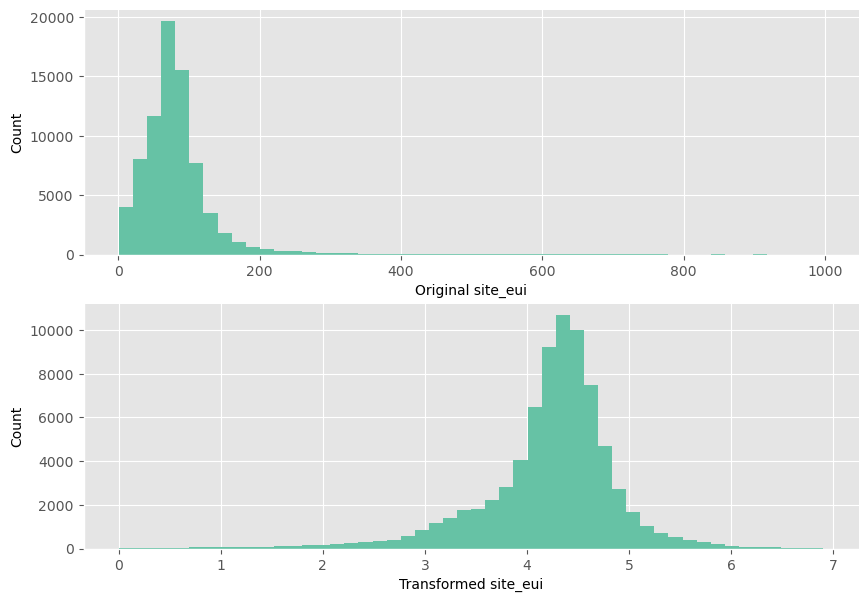

In [99]:
target = 'site_eui'
plt.figure(figsize=(10,7))
# plot the original variable vs sale price    
plt.subplot(2, 1, 1)
train[target].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Original ' + target)

# plot transformed variable vs sale price
plt.subplot(2, 1, 2)
np.log(train[target]).hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Transformed ' + target);

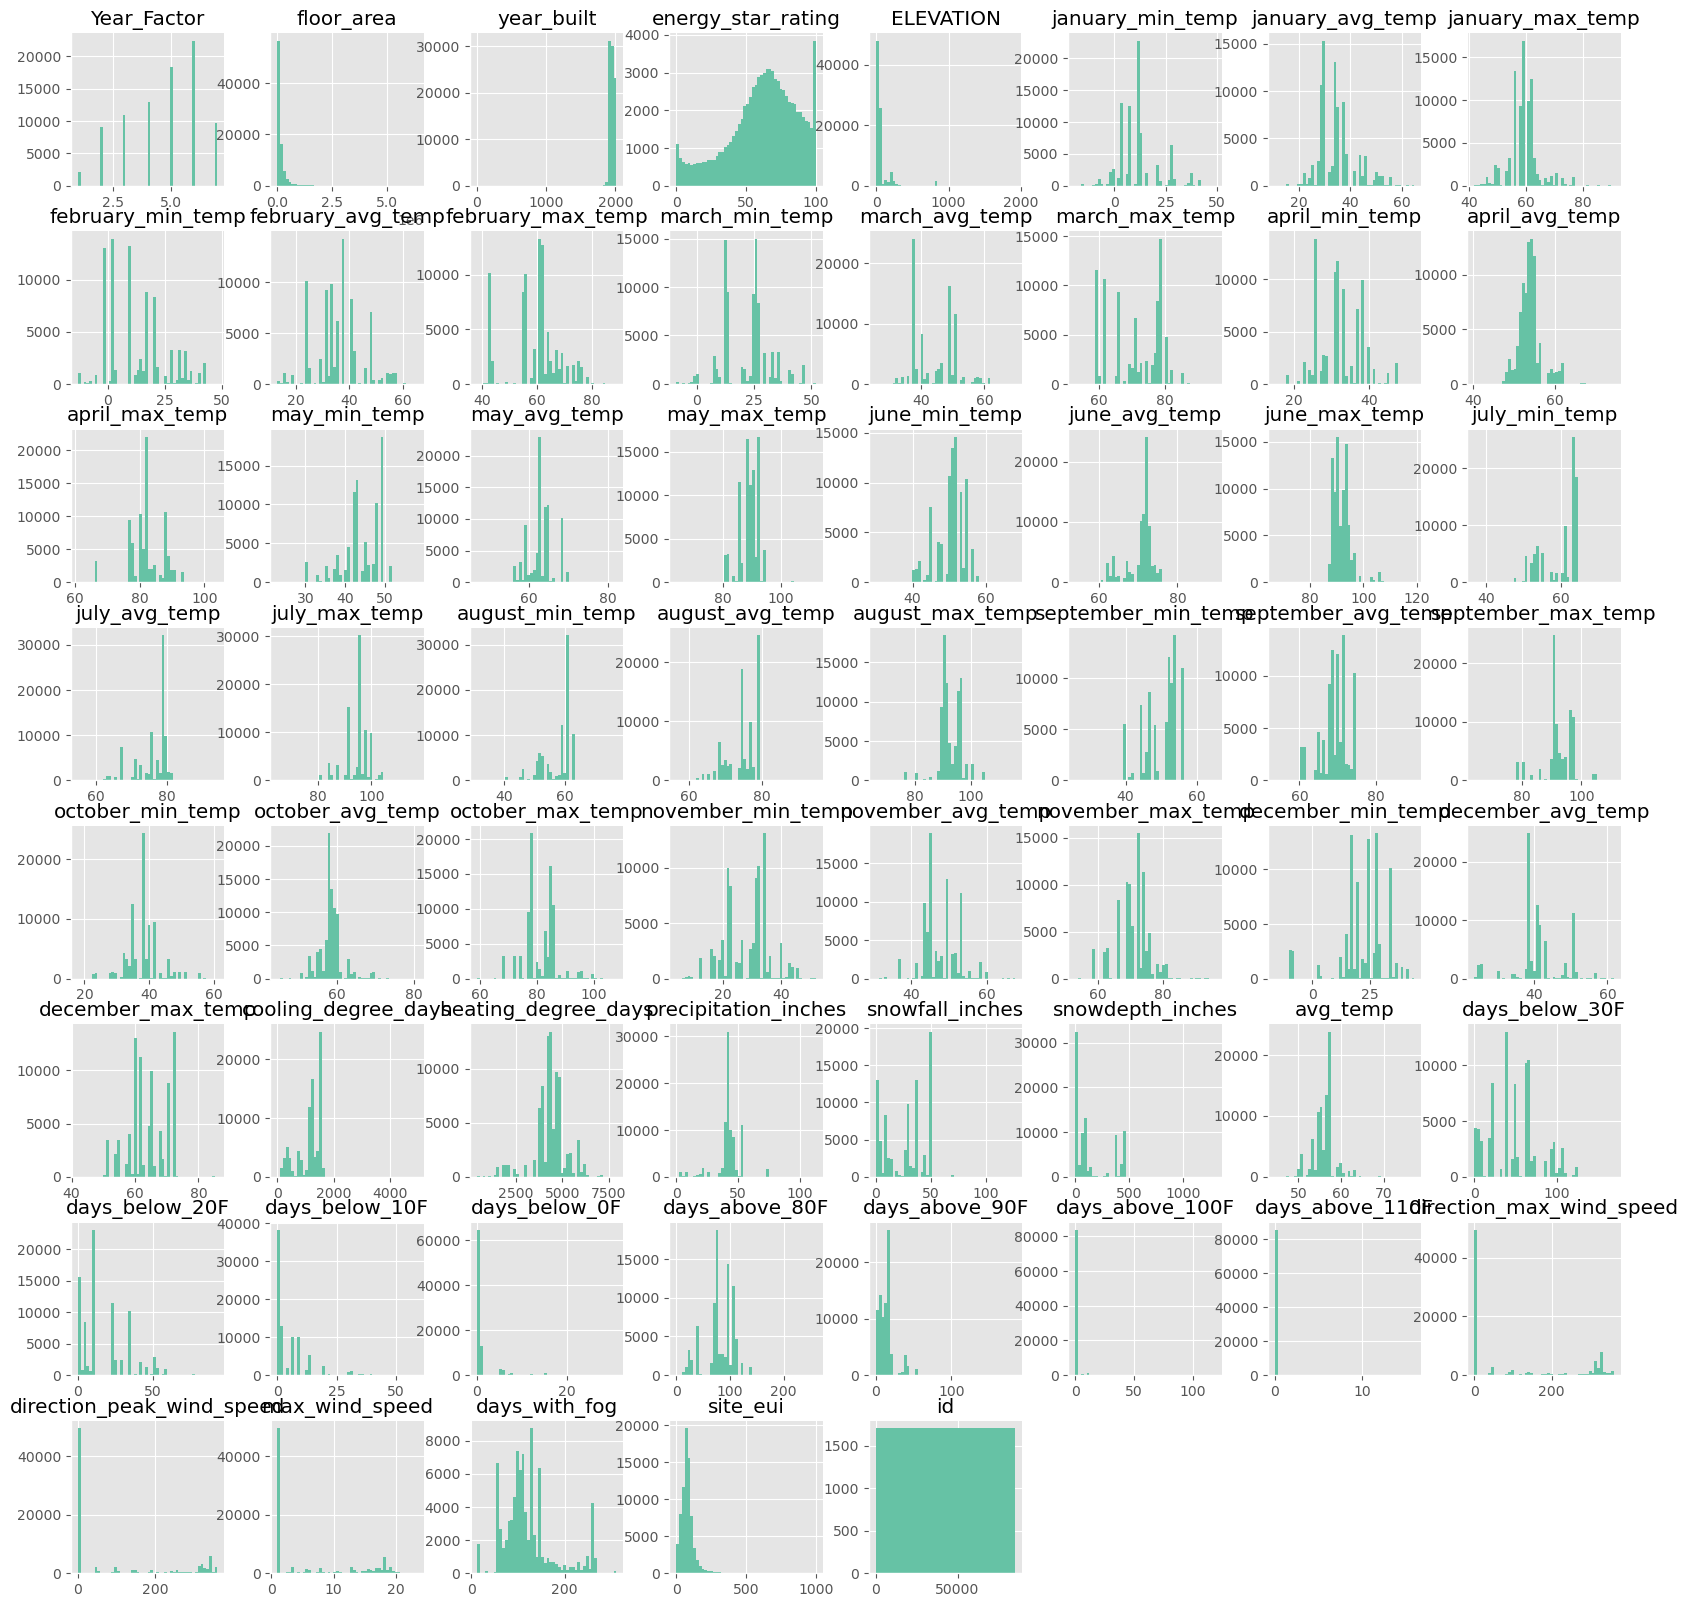

In [101]:
nums = train.loc[:, train.dtypes != 'object'].columns
combined_df[nums].hist(bins=50, figsize=(20,20)) 
plt.show();

In [102]:
df_combined_te[nums].skew().sort_values(key=abs, ascending=False)[:5]

days_above_110F    89.873857
days_above_100F    24.615438
year_built        -11.716647
floor_area          6.701786
ELEVATION           5.140444
dtype: float64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    Binarize very skewed variables

In [103]:
skewed = ['days_above_110F', 'days_above_100F']

for var in skewed:
    
    # map the variable values into 0 and 1
    df_combined_te[var] = np.where(df_combined_te[var]==0, 0, 1)

### <span style="font-family:cursive;text-align:center">Saving feature dataset</span>

In [38]:
saved = False
if saved:
    !pip install pickle5 --quiet
    import pickle5 as pickle
    data_path = 'feature_transformed_set_TEonly.pkl'
    with open(data_path, "rb") as fh:
        df = pickle.load(fh)
else:
    combined_df.to_pickle('feature_transformed_set_TEonly.pkl')


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
df_combined_te.shape

(85462, 96)

In [105]:
df_combined_te.head()

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0          1.0     61242.0      1942.0                11.0        2.4   
1          1.0    274000.0      1955.0                45.0        1.8   
2          1.0    280025.0      1951.0                97.0        1.8   
3          1.0     55325.0      1980.0                46.0        1.8   
4          1.0     66000.0      1985.0               100.0        2.4   

   january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0              36.0              50.5              68.0               35.0   
1              36.0              50.5              68.0               35.0   
2              36.0              50.5              68.0               35.0   
3              36.0              50.5              68.0               35.0   
4              36.0              50.5              68.0               35.0   

   february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0          50.589286               73.0            40.0       53.693548   
1          50.589286               73.0            40.0       53.693548   
2          50.589286               73.0            40.0       53.693548   
3          50.589286               73.0            40.0       53.693548   
4          50.589286               73.0            40.0       53.693548   

   march_max_temp  april_min_temp  april_avg_temp  april_max_temp  \
0            80.0            41.0            55.5            78.0   
1            80.0            41.0            55.5            78.0   
2            80.0            41.0            55.5            78.0   
3            80.0            41.0            55.5            78.0   
4            80.0            41.0            55.5            78.0   

   may_min_temp  may_avg_temp  may_max_temp  june_min_temp  june_avg_temp  \
0          46.0     56.854839          84.0           50.0           60.5   
1          46.0     56.854839          84.0           50.0           60.5   
2          46.0     56.854839          84.0           50.0           60.5   
3          46.0     56.854839          84.0           50.0           60.5   
4          46.0     56.854839          84.0           50.0           60.5   

   june_max_temp  july_min_temp  july_avg_temp  july_max_temp  \
0           90.0           52.0      62.725806           84.0   
1           90.0           52.0      62.725806           84.0   
2           90.0           52.0      62.725806           84.0   
3           90.0           52.0      62.725806           84.0   
4           90.0           52.0      62.725806           84.0   

   august_min_temp  august_avg_temp  august_max_temp  september_min_temp  \
0             52.0         62.16129             85.0                52.0   
1             52.0         62.16129             85.0                52.0   
2             52.0         62.16129             85.0                52.0   
3             52.0         62.16129             85.0                52.0   
4             52.0         62.16129             85.0                52.0   

   september_avg_temp  september_max_temp  october_min_temp  october_avg_temp  \
0               64.65                90.0              47.0         63.016129   
1               64.65                90.0              47.0         63.016129   
2               64.65                90.0              47.0         63.016129   
3               64.65                90.0              47.0         63.016129   
4               64.65                90.0              47.0         63.016129   

   october_max_temp  ...  building_class  \
0              83.0  ...      Commercial   
1              83.0  ...      Commercial   
2              83.0  ...      Commercial   
3              83.0  ...      Commercial   
4              83.0  ...      Commercial   

                               facility_type  dataset    site_eui  \
0               Grocery_store_or_food_market    train  248.682615   
1  Warehouse_Distribution_or

# <span style="font-family:cursive;text-align:center">🧰 Baseline Modelling</span>

In [106]:
# cats = ['State_Factor', 'facility_type', 'building_class', 'days_above_100F', 'days_above_110F']

# typecasting numerical features
for col in df_combined_te.drop(columns=['dataset', 'id', 'site_eui', 'days_above_100F', 'days_above_110F']).columns:
    df_combined_te[col] = df_combined_te[col].astype('float64')

ValueError: could not convert string to float: 'State_1'

In [107]:
df_combined_te

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0              1.0     61242.0      1942.0                11.0        2.4   
1              1.0    274000.0      1955.0                45.0        1.8   
2              1.0    280025.0      1951.0                97.0        1.8   
3              1.0     55325.0      1980.0                46.0        1.8   
4              1.0     66000.0      1985.0               100.0        2.4   
...            ...         ...         ...                 ...        ...   
85457          7.0    305925.0      2013.0                99.0      812.0   
85458          7.0     34909.0      1910.0                94.0       26.5   
85459          7.0     42393.0      2014.0                94.0      812.0   
85460          7.0     25368.0      1992.0                79.0      812.0   
85461          7.0     45640.0      1994.0                87.0       26.5   

       january_min_temp  january_avg_temp  january_max_temp  \
0                  36.0          50.50000              68.0   
1                  36.0          50.50000              68.0   
2                  36.0          50.50000              68.0   
3                  36.0          50.50000              68.0   
4                  36.0          50.50000              68.0   
...                 ...               ...               ...   
85457              21.0          38.66129              54.0   
85458              21.0          38.66129              54.0   
85459              21.0          38.66129              54.0   
85460              21.0          38.66129              54.0   
85461              21.0          38.66129              54.0   

       february_min_temp  february_avg_temp  february_max_temp  \
0                   35.0          50.589286               73.0   
1                   35.0          50.589286               73.0   
2                   35.0          50.589286               73.0   
3                   35.0          50.589286               73.0   
4                   35.0          50.589286               73.0   
...                  ...                ...                ...   
85457               28.0          41.625000               59.0   
85458               28.0          41.625000               59.0   
85459               28.0          41.625000               59.0   
85460               28.0          41.625000               59.0   
85461               28.0          41.625000               59.0   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0                40.0       53.693548            80.0            41.0   
1                40.0       53.693548            80.0            41.0   
2                40.0       53.693548            80.0            41.0   
3                40.0       53.693548            80.0            41.0   
4                40.0       53.693548            80.0            41.0   
...               ...             ...             ...             ...   
85457            33.0       46.500000            59.0            37.0   
85458            33.0       46.500000            59.0            37.0   
85459            33.0       46.500000            59.0            37.0   
85460            33.0       46.500000            59.0            37.0   
85461            33.0       46.500000            59.0            37.0   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0           55.500000            78.0          46.0     56.854839   
1           55.500000            78.0          46.0     56.854839   
2           55.500000            78.0          46.0     56.854839   
3           55.500000            78.0          46.0     56.854839   
4           55.500000            78.0          46.0     56.854839   
...               ...             ...           ...           ...   
85457       50.833333            67.0          42.0     58.112903   
85458       50.833333            67.0          42.0     58.112903   
85459       50.833333            6

In [108]:
train = df_combined_te[df_combined_te['dataset']=='train']
test = df_combined_te[df_combined_te['dataset']=='test']

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

test_ids = test['id']
train_ids = train['id']

target = train['site_eui'] #y_train

train = train.drop(['id', 'dataset', 'site_eui'], axis=1) #X_train
test = test.drop(['id', 'dataset', 'site_eui'], axis=1) #X_test

In [109]:
y_test = pd.read_csv('y_test.csv')

X_train = train
X_test = test
y_train = target
y_test = y_test['site_eui']
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'y_test.csv'

### <span style="font-family:cursive;text-align:center">Catboost</span>

In [49]:
# get discrete end categorical features colums indexes 
# needed later for the cat bosst model
cats_discrete_idx = np.where(train.dtypes != 'float64')[0]

In [50]:
catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100
                        )

In [51]:
catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

y_pred = catb.predict(X_test)

0:	learn: 57.8857111	test: 61.1532205	best: 61.1532205 (0)	total: 1.93s	remaining: 16m 1s
75:	learn: 46.3795114	test: 66.3864976	best: 61.1532205 (0)	total: 16.6s	remaining: 1m 32s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 61.15322052
bestIteration = 0

Shrink model to first 1 iterations.


In [52]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 61.1532205462329
 MAE: 40.26767227483133
 MSE: 3739.7163831762023
 R2: -0.034305844684676456


### <span style="font-family:cursive;text-align:center">XGBoost</span>

In [53]:
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [54]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 81.93412523040621
 MAE: 52.59364141021279
 MSE: 6713.200877271887
 R2: -0.8566923778341129


### <span style="font-family:cursive;text-align:center">RandomForest</span>

In [55]:
rf = RandomForestRegressor(random_state=1, criterion='mse', max_depth = 15, min_samples_split= 2)
rf.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [56]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 81.93412523040621
 MAE: 52.59364141021279
 MSE: 6713.200877271887
 R2: -0.8566923778341129


### <span style="font-family:cursive;text-align:center">Lasso Regression</span>

In [62]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [63]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 66.08328222674918
 MAE: 43.26164501092259
 MSE: 4367.000189860184
 R2: -0.20779582121018425


# <span style="font-family:cursive;text-align:center">Model Evaluation</span>

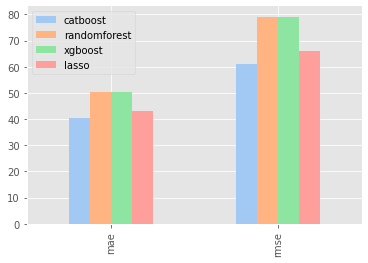

In [64]:
error_rec = {
    "catboost": {
        "mae": 40.29268484855883,
        "rmse": 61.19378120765249,
    },
    "randomforest": {
        "mae": 50.1839889322522,
        "rmse": 79.12972350643851,
    },
    "xgboost": {
         "mae": 50.1839889322522,
        "rmse": 79.12972350643851,
    },
    "lasso": {
         "mae": 43.26164501092259,
        "rmse": 66.08328222674918,
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

# <span style="font-family:cursive;text-align:center">Hyperparameter Tuning</span>

### <span style="font-family:cursive;text-align:center">Using CrossValidation on CatBoost</span>

In [63]:
# prepaere the out of folds predictions 
train_oof = np.zeros((train.shape[0],))
test_preds = np.zeros(test.shape[0])

NUM_FOLDS = 5
kf = KFold(n_splits = NUM_FOLDS, shuffle=True, random_state=0)


for fold, (train_idx, test_idx) in tqdm.tqdm(enumerate(kf.split(train, target))):
    X_train, X_test = train.iloc[train_idx][test.columns], train.iloc[test_idx][test.columns]
    y_train, y_test = target[train_idx], target[test_idx]
    
    catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)
    # train model
    catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

    oof = catb.predict(X_test)
    train_oof[test_idx] = oof
    test_preds += catb.predict(test)/NUM_FOLDS      
    print(f"out-of-folds prdiction ==== fold_{fold} RMSE",np.sqrt(mean_squared_error(oof, y_test, squared=False)))


0it [00:00, ?it/s]Warning: Overfitting detector is active, thus evaluation metric is calculated on every iteration. 'metric_period' is ignored for evaluation metric.


0:	learn: 58.0647119	test: 57.0252197	best: 57.0252197 (0)	total: 662ms	remaining: 5m 30s
75:	learn: 44.8380440	test: 44.6374740	best: 44.6374740 (75)	total: 48.9s	remaining: 4m 32s
150:	learn: 41.7604246	test: 42.5854370	best: 42.5854370 (150)	total: 1m 42s	remaining: 3m 56s
225:	learn: 40.3469875	test: 41.9718273	best: 41.9718273 (225)	total: 2m 32s	remaining: 3m 4s
300:	learn: 39.4251032	test: 41.6714432	best: 41.6714432 (300)	total: 3m 26s	remaining: 2m 16s
375:	learn: 38.6826740	test: 41.4647676	best: 41.4647676 (375)	total: 4m 25s	remaining: 1m 27s
450:	learn: 38.0211988	test: 41.2858798	best: 41.2858798 (450)	total: 5m 27s	remaining: 35.6s
499:	learn: 37.6054919	test: 41.1906746	best: 41.1906746 (499)	total: 6m	remaining: 0us

bestTest = 41.19067457
bestIteration = 499



1it [06:01, 361.83s/it]

out-of-folds prdiction ==== fold_0 RMSE 6.417996146274318


0:	learn: 57.9466708	test: 57.4040279	best: 57.4040279 (0)	total: 608ms	remaining: 5m 3s
75:	learn: 44.7321527	test: 45.1394053	best: 45.1394053 (75)	total: 45.7s	remaining: 4m 14s
150:	learn: 41.7564568	test: 43.1072732	best: 43.1072732 (150)	total: 1m 29s	remaining: 3m 26s
225:	learn: 40.4017976	test: 42.4810175	best: 42.4810175 (225)	total: 2m 12s	remaining: 2m 40s
300:	learn: 39.4777556	test: 42.0866177	best: 42.0866177 (300)	total: 2m 56s	remaining: 1m 56s
375:	learn: 38.6822398	test: 41.8305094	best: 41.8305094 (375)	total: 3m 41s	remaining: 1m 13s
450:	learn: 37.9681277	test: 41.6218909	best: 41.6218909 (450)	total: 4m 34s	remaining: 29.8s
499:	learn: 37.5077918	test: 41.5416975	best: 41.5416975 (499)	total: 5m 5s	remaining: 0us

bestTest = 41.54169753
bestIteration = 499



2it [11:08, 329.36s/it]

out-of-folds prdiction ==== fold_1 RMSE 6.445284904331446


0:	learn: 57.6833091	test: 58.5721496	best: 58.5721496 (0)	total: 670ms	remaining: 5m 34s
75:	learn: 44.0828710	test: 47.1427961	best: 47.1427961 (75)	total: 49.3s	remaining: 4m 34s
150:	learn: 41.0513870	test: 45.5018560	best: 45.5018560 (150)	total: 1m 37s	remaining: 3m 44s
225:	learn: 39.6137211	test: 45.0176394	best: 45.0176394 (225)	total: 2m 23s	remaining: 2m 53s
300:	learn: 38.6515852	test: 44.7947356	best: 44.7947356 (300)	total: 3m 9s	remaining: 2m 5s
375:	learn: 37.8819930	test: 44.6789056	best: 44.6789056 (375)	total: 3m 53s	remaining: 1m 16s
450:	learn: 37.2164744	test: 44.5930221	best: 44.5927865 (448)	total: 4m 37s	remaining: 30.1s
499:	learn: 36.8336992	test: 44.5263072	best: 44.5255094 (497)	total: 5m 5s	remaining: 0us

bestTest = 44.5255094
bestIteration = 497

Shrink model to first 498 iterations.


3it [16:15, 319.36s/it]

out-of-folds prdiction ==== fold_2 RMSE 6.672743775947536


0:	learn: 58.4714411	test: 55.3534444	best: 55.3534444 (0)	total: 614ms	remaining: 5m 6s
75:	learn: 44.8993434	test: 43.4289471	best: 43.4289471 (75)	total: 50.9s	remaining: 4m 43s
150:	learn: 41.7294445	test: 41.7826438	best: 41.7826438 (150)	total: 1m 34s	remaining: 3m 38s
225:	learn: 40.2437996	test: 41.2938579	best: 41.2938579 (225)	total: 2m 23s	remaining: 2m 53s
300:	learn: 39.2939935	test: 41.0728000	best: 41.0719860 (298)	total: 3m 15s	remaining: 2m 9s
375:	learn: 38.5789041	test: 40.9761773	best: 40.9753091 (374)	total: 4m 8s	remaining: 1m 22s
450:	learn: 38.0408769	test: 40.8921488	best: 40.8881512 (449)	total: 4m 56s	remaining: 32.2s
499:	learn: 37.6423882	test: 40.8334760	best: 40.8333435 (498)	total: 5m 37s	remaining: 0us

bestTest = 40.8333435
bestIteration = 498

Shrink model to first 499 iterations.


4it [21:56, 327.56s/it]

out-of-folds prdiction ==== fold_3 RMSE 6.390097300720981


0:	learn: 57.1014034	test: 60.8300969	best: 60.8300969 (0)	total: 1.22s	remaining: 10m 6s
75:	learn: 43.9828826	test: 48.2016156	best: 48.2016156 (75)	total: 1m 7s	remaining: 6m 18s
150:	learn: 41.0365896	test: 45.9465946	best: 45.9465946 (150)	total: 2m 13s	remaining: 5m 8s
225:	learn: 39.6494145	test: 45.2280179	best: 45.2280179 (225)	total: 3m 40s	remaining: 4m 27s
300:	learn: 38.8073529	test: 44.9150327	best: 44.9150327 (300)	total: 4m 28s	remaining: 2m 57s
375:	learn: 38.2404638	test: 44.7359985	best: 44.7359985 (375)	total: 5m 19s	remaining: 1m 45s
450:	learn: 37.6956429	test: 44.6338453	best: 44.6338453 (450)	total: 6m 17s	remaining: 41s
499:	learn: 37.3722504	test: 44.5696934	best: 44.5696934 (499)	total: 6m 52s	remaining: 0us

bestTest = 44.56969342
bestIteration = 499



5it [28:51, 346.30s/it]

out-of-folds prdiction ==== fold_4 RMSE 6.676053723438859


### <span style="font-family:cursive;text-align:center">Using Optuna with Random Forest</span> 

In [64]:
# cross validating training data
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Objective function
def random_forest_objective(trial, data=X_train, target=y_train):
    # Dictionary to store best parameters
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "max_features": trial.suggest_float("max_features", 0.01, 0.95)
    }
     
    model = RandomForestRegressor(**param)
    
    # Setting random seed and kfolds for cross-validation
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, data, target, cv=kfolds, scoring="neg_root_mean_squared_error")
    return scores.mean()



In [65]:
def tuner(objective, n=5, direction='minimize'): 
    # Create Study object
    study = optuna.create_study(direction="minimize")

    # Optimize the study
    study.optimize(objective, n_trials=n)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [66]:
%%time
rf_param, rf_score = tuner(random_forest_objective,1)
rf_tuned_model = RandomForestRegressor(**rf_param)

[I 2023-04-26 00:01:29,760] A new study created in memory with name: no-name-be939805-827c-4bcb-9a39-032998cfc346
[I 2023-04-26 00:13:22,905] Trial 0 finished with value: -43.94298794239326 and parameters: {'n_estimators': 300, 'max_depth': 16, 'min_samples_split': 6, 'max_features': 0.08847732245673771}. Best is trial 0 with value: -43.94298794239326.


Best score: -43.94298794239326
Optimized parameters: {'n_estimators': 300, 'max_depth': 16, 'min_samples_split': 6, 'max_features': 0.08847732245673771}

<<<<<<<<<< Tuning complete... >>>>>>>>>>
CPU times: total: 11min 30s
Wall time: 11min 53s


In [67]:
rf_tuned_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, max_features=0.08847732245673771,
                      min_samples_split=6, n_estimators=300)

### <span style="font-family:cursive;text-align:center">Final Evaluation</span>

Text(0.5, 0, 'iteration')

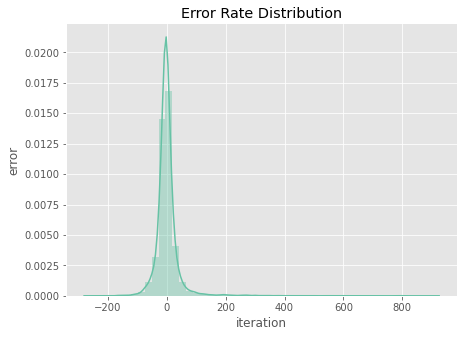

In [68]:
y_hat_tuned = catb.predict(X_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

Text(0.5, 0, 'iteration')

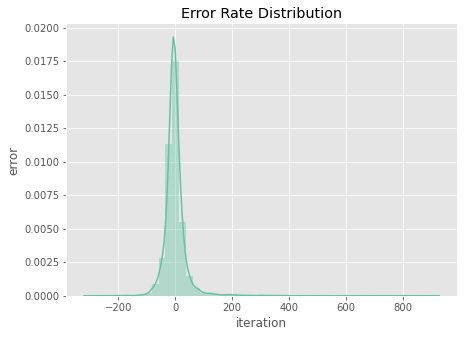

In [69]:
y_hat_tuned = rf_tuned_model.predict(X_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

### <span style="font-family:cursive;text-align:center">Saving Models</span> 

In [70]:
with open('rf_tuned_final.joblib', 'wb') as f:
    joblib.dump(rf_tuned_model, f, compress=1)

with open('catb_best_final.joblib', 'wb') as f:
    joblib.dump(catb,f,compress=3)

In [71]:
## Load models here
load = False
if load:
    with open('rf_tuned_final.joblib', 'rb') as f:
        rf = joblib.load(f)

    with open('catb_best_final.joblib', 'rb') as f:
        catb = joblib.load(f)

# <span style="font-family:cursive;text-align:center">Explainable AI</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

we will extract new weather statistics from the building location weather featurespick your sample to study the model upon

In [86]:
size = 2000

sample_exists = False

if sample_exists:
    sample_set = pd.read_csv('data/shap/sample2000.csv')
else:
    sample_set = X_test.sample(size)
sample_set

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
28992          4.0    101422.0      1927.0           71.000000       42.7   
35013          2.0     60772.0      1928.0           37.285714        3.4   
4358           2.0    778782.0      2002.0           91.000000        2.4   
28869          2.0     98000.0      1848.0           97.000000       42.7   
19632          6.0     51000.0      1994.0           83.000000      198.1   
...            ...         ...         ...                 ...        ...   
50726          5.0     77372.0      1992.0           90.000000       21.3   
17407          6.0     80219.0      2002.0           90.000000      205.7   
71759          5.0    890130.0      1939.0           37.000000       15.2   
42324          2.0     60720.0      1939.0           43.571429        3.4   
18233          6.0    140000.0      1945.0           81.000000      198.1   

       january_min_temp  january_avg_temp  january_max_temp  \
28992               4.0         28.596774              58.0   
35013              13.0         37.322581              62.0   
4358               27.0         48.951613              69.0   
28869              13.0         37.322581              62.0   
19632              -2.0         25.166667              50.0   
...                 ...               ...               ...   
50726               8.0         29.854839              56.0   
17407              -4.0         23.350000              48.0   
71759               8.0         29.854839              56.0   
42324              13.0         37.322581              62.0   
18233              -2.0         25.166667              50.0   

       february_min_temp  february_avg_temp  february_max_temp  \
28992                9.0          31.625000               56.0   
35013               20.0          40.879310               62.0   
4358                33.0          51.655172               78.0   
28869               20.0          40.879310               62.0   
19632                2.0          29.711538               65.0   
...                  ...                ...                ...   
50726                2.0          23.946429               43.0   
17407                3.0          30.258621               63.0   
71759                2.0          23.946429               43.0   
42324               20.0          40.879310               62.0   
18233                2.0          29.711538               65.0   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
28992            13.0       37.661290            66.0            31.0   
35013            25.0       50.935484            78.0            38.0   
4358             34.0       52.822581            74.0            37.0   
28869            25.0       50.935484            78.0            38.0   
19632            12.0       44.516129            73.0            23.0   
...               ...             ...             ...             ...   
50726            12.0       38.096774            62.0            32.0   
17407            14.0       43.645161            70.0            24.0   
71759            12.0       38.096774            62.0            32.0   
42324            25.0       50.935484            78.0            38.0   
18233            12.0       44.516129            73.0            23.0   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
28992       52.333333            77.0          49.0     64.000000   
35013       54.766667            88.0          49.0     65.096774   
4358        58.850000            90.0          45.0     64.612903   
28869       54.766667            88.0          49.0     65.096774   
19632       49.017241            88.0          38.0     61.933333   
...               ...             ...           ...           ...   
50726       54.250000            80.0          48.0     68.516129   
17407       49.413793            83.0          36.0     59.306452   
71759       54.250000            8

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> calculate shap values

In [87]:
is_saved = False

if is_saved:
    with open('data/shap/shap_values_sample2000.pkl', 'rb') as f:
        shap_values = joblib.load(f)
else:
    shap_values = shap.TreeExplainer(rf).shap_values(sample_set)

In [88]:
shap.initjs()

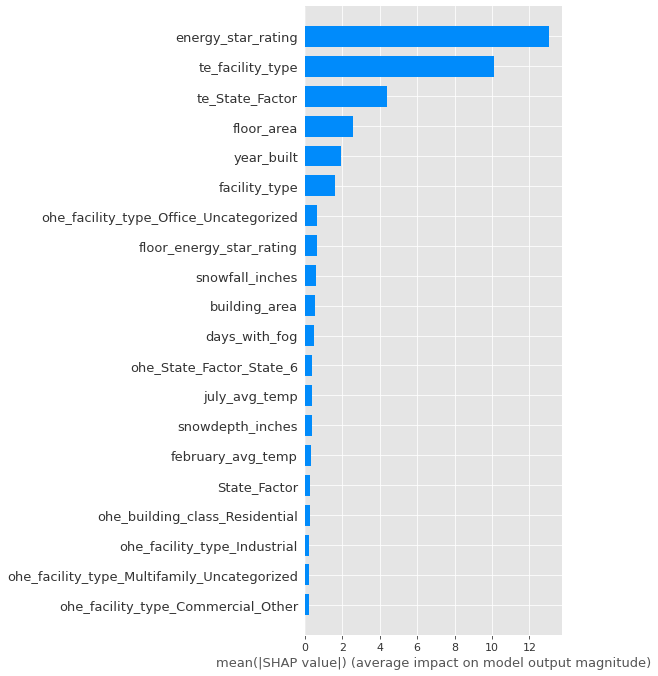

In [89]:
shap.summary_plot(shap_values, sample_set, plot_type="bar")

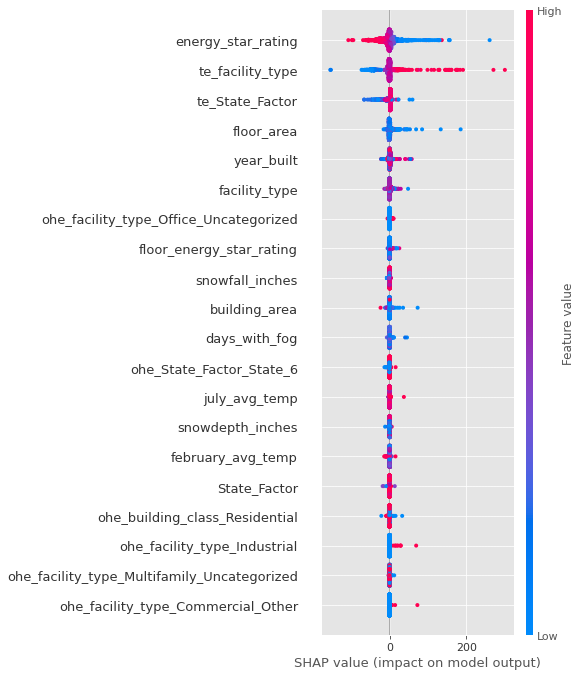

In [90]:
shap.summary_plot(shap_values, sample_set)

In [92]:
limit = 200
shap.force_plot(shap.TreeExplainer(rf_tuned_model).expected_value[0], shap_values[0:limit,:], sample_set.iloc[0:limit,:])

In [93]:
row = 60
print(y_pred[row])
shap.initjs()
shap.force_plot(shap.TreeExplainer(rf_tuned_model).expected_value[0], shap_values[row], sample_set.iloc[row])

21.014046


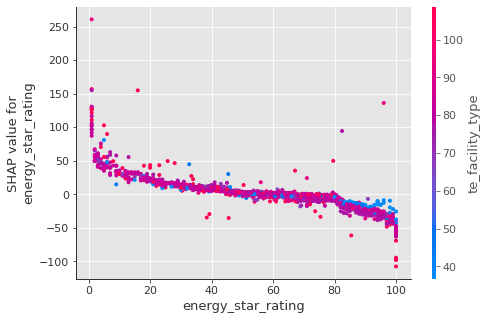

In [94]:
shap.dependence_plot('energy_star_rating', shap_values, sample_set)

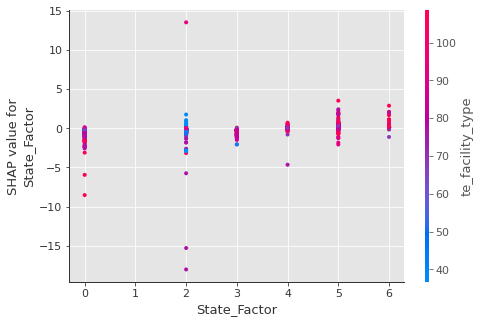

In [95]:
shap.dependence_plot('State_Factor', shap_values, sample_set)

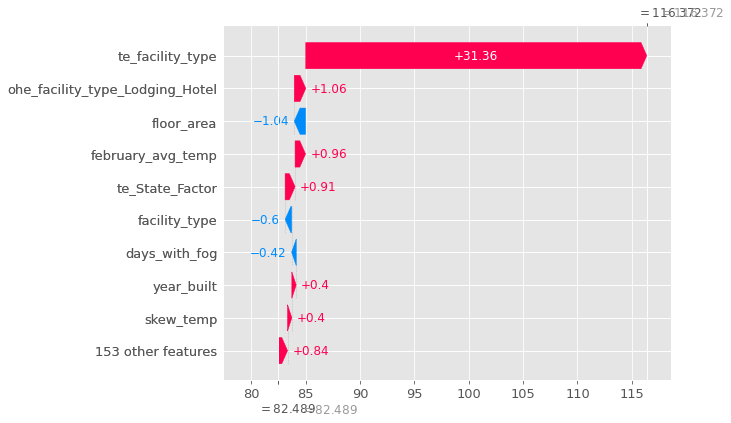

In [96]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf_tuned_model).expected_value[0], 
                                       shap_values[row],
                                       feature_names=sample_set.columns.tolist()
                                      )

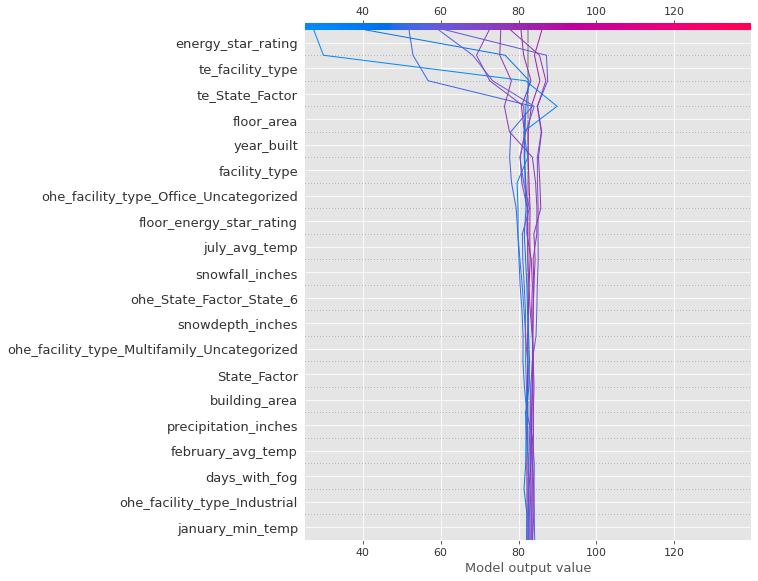

In [97]:
start = 120
limit = 130

shap.decision_plot(shap.TreeExplainer(rf_tuned_model).expected_value[0], 
                   shap_values[start:limit], 
                   feature_names=sample_set.columns.tolist())

 99%|===================| 494/500 [00:52<00:00]        

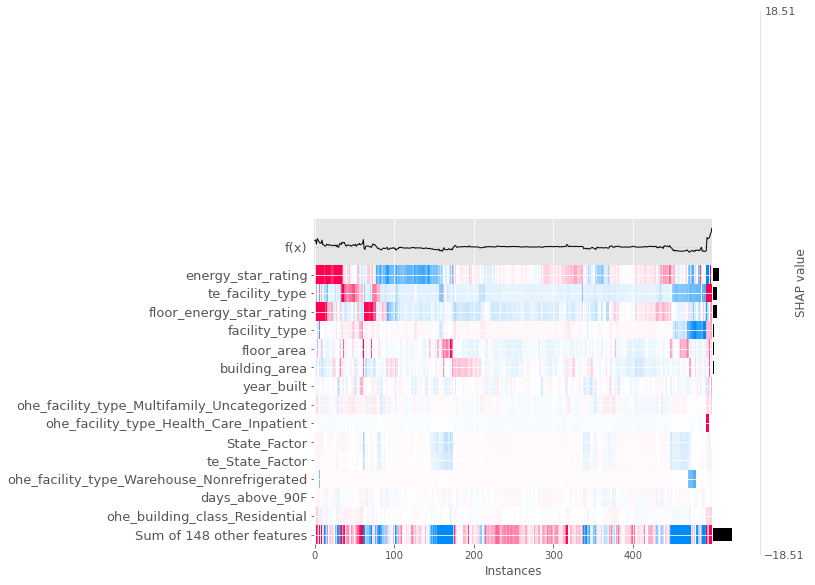

In [101]:
limit = 500
shap.plots.heatmap(shap.TreeExplainer(rf_tuned_model, data=sample_set)(sample_set[:limit]), max_display=15)